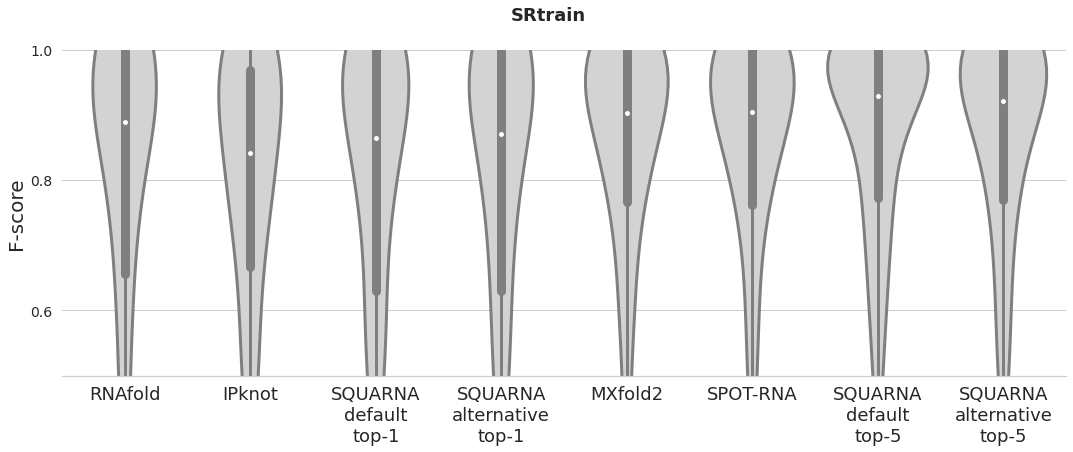

RNAfold RNAfold 1.0
RNAfold IPknot 0.7147486339315736
RNAfold SQUARNA 0.4706220796328947
RNAfold SQUARNAalt 0.7393698478461241
RNAfold MXfold2 0.003239669000687981
RNAfold SPOT-RNA 0.004278709011499459
RNAfold SQUARNA5 4.618423201882646e-06
RNAfold SQUARNAalt5 0.001277165634239691
IPknot RNAfold 0.7147486339315736
IPknot IPknot 1.0
IPknot SQUARNA 0.6987962004664451
IPknot SQUARNAalt 0.9799007228101061
IPknot MXfold2 0.005101720411147414
IPknot SPOT-RNA 0.006841927093003439
IPknot SQUARNA5 3.802114355159609e-06
IPknot SQUARNAalt5 0.001912760060230023
SQUARNA RNAfold 0.4706220796328947
SQUARNA IPknot 0.6987962004664451
SQUARNA SQUARNA 1.0
SQUARNA SQUARNAalt 0.6888021519481453
SQUARNA MXfold2 0.01724424496915953
SQUARNA SPOT-RNA 0.022069174562474474
SQUARNA SQUARNA5 3.0747286718905124e-05
SQUARNA SQUARNAalt5 0.007273086897759755
SQUARNAalt RNAfold 0.7393698478461241
SQUARNAalt IPknot 0.9799007228101061
SQUARNAalt SQUARNA 0.6888021519481453
SQUARNAalt SQUARNAalt 1.0
SQUARNAalt MXfold2 0.00

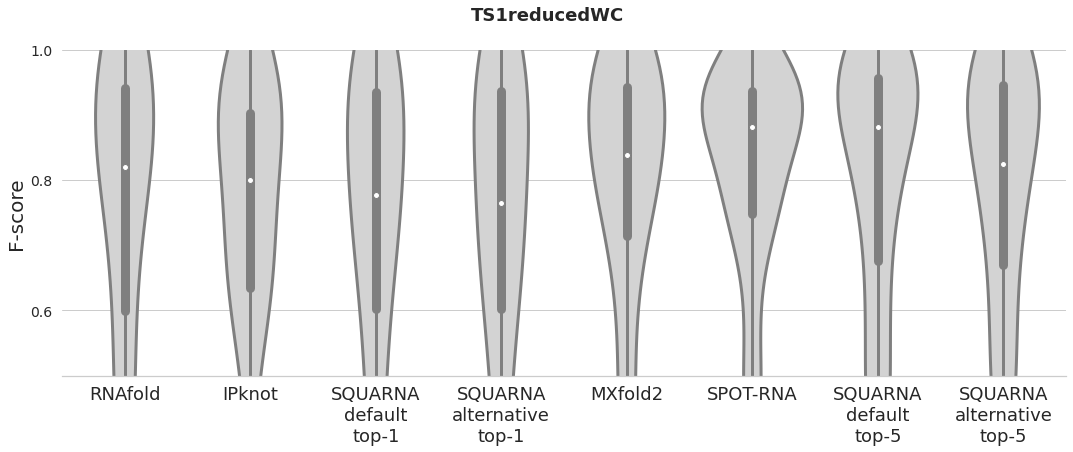

RNAfold RNAfold 1.0
RNAfold IPknot 0.7114118010975453
RNAfold SQUARNA 0.9464550887627303
RNAfold SQUARNAalt 0.8881999083177781
RNAfold MXfold2 0.1335344149726655
RNAfold SPOT-RNA 0.024724878464466225
RNAfold SQUARNA5 0.09675863666008636
RNAfold SQUARNAalt5 0.26251988654274366
IPknot RNAfold 0.7114118010975453
IPknot IPknot 1.0
IPknot SQUARNA 0.6435515130459506
IPknot SQUARNAalt 0.583751662512394
IPknot MXfold2 0.20303102240590437
IPknot SPOT-RNA 0.032095044874973076
IPknot SQUARNA5 0.14524352007872227
IPknot SQUARNAalt5 0.400100202686706
SQUARNA RNAfold 0.9464550887627303
SQUARNA IPknot 0.6435515130459506
SQUARNA SQUARNA 1.0
SQUARNA SQUARNAalt 0.9392703533738906
SQUARNA MXfold2 0.09730284743147469
SQUARNA SPOT-RNA 0.013596133478673483
SQUARNA SQUARNA5 0.06728176650752998
SQUARNA SQUARNAalt5 0.20939640430635714
SQUARNAalt RNAfold 0.8881999083177781
SQUARNAalt IPknot 0.583751662512394
SQUARNAalt SQUARNA 0.9392703533738906
SQUARNAalt SQUARNAalt 1.0
SQUARNAalt MXfold2 0.07872343192225262
S

In [26]:
#single-seq violins
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

for dataset in ("SRtrain","TS1reducedWC"):
    
    tools = "RNAfold IPknot SQUARNA SQUARNAalt MXfold2 SPOT-RNA SQUARNA5 SQUARNAalt5".split(' ')
    
    labels = ["RNAfold","IPknot", "SQUARNA\ndefault\ntop-1", 
              "SQUARNA\nalternative\ntop-1", 
              "MXfold2", "SPOT-RNA", 
              "SQUARNA\ndefault\ntop-5", 
              "SQUARNA\nalternative\ntop-5", ]
    
    res = {}
    
    for tool in tools:
        
        fscores = []
        
        with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines = tsv.readlines()
            title = lines[0].strip().split('\t')
            fsind = title.index("FS")
            for line in lines[1:]:
                fscores.append(float(line.strip().split('\t')[fsind]))
            
        res[tool] = fscores
    
    sns.set(style="whitegrid")

    df = pd.DataFrame(res)

    f, ax = plt.subplots(figsize=(18, 6))
    
    ax.set_ylim([0.5,1.0])

    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)

    sns.despine(left=True)

    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.6,0.8,1.0],labels=[0.6,0.8,1.0], size=14)
    
    plt.show()
    
    for tool1 in tools:
        for tool2 in tools:
            statres = stats.ttest_ind(res[tool1], res[tool2])
            print(tool1, tool2,statres.pvalue)


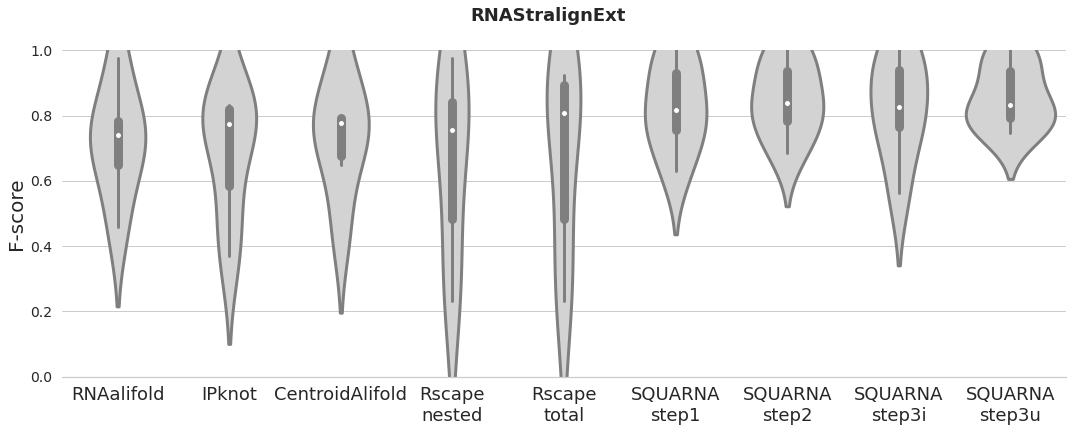

RNAalifold IPknot 0.357 0.7284908793664657
RNAalifold CentroidAlifold -0.143 0.889007599574437
RNAalifold RscapeNested 0.421 0.6823801627170124
RNAalifold RscapeTotal 0.319 0.7564262743018041
RNAalifold SQUARNAs1 -1.17 0.2691071024958675
RNAalifold SQUARNAs2 -1.497 0.16533295676407908
RNAalifold SQUARNAs3i -1.057 0.3154111366543758
RNAalifold SQUARNAs3u -1.686 0.122653511302952
IPknot CentroidAlifold -0.489 0.635588463888902
IPknot RscapeNested 0.143 0.8893587157728104
IPknot RscapeTotal 0.047 0.9637545851644532
IPknot SQUARNAs1 -1.487 0.1679359305125716
IPknot SQUARNAs2 -1.803 0.10162745808531706
IPknot SQUARNAs3i -1.367 0.20155368692971107
IPknot SQUARNAs3u -1.985 0.07527137952790801
CentroidAlifold RscapeNested 0.523 0.6120995242438056
CentroidAlifold RscapeTotal 0.42 0.6832031467872745
CentroidAlifold SQUARNAs1 -0.994 0.3437337131247796
CentroidAlifold SQUARNAs2 -1.304 0.22157398369582418
CentroidAlifold SQUARNAs3i -0.894 0.3925693797663006
CentroidAlifold SQUARNAs3u -1.48 0.169632

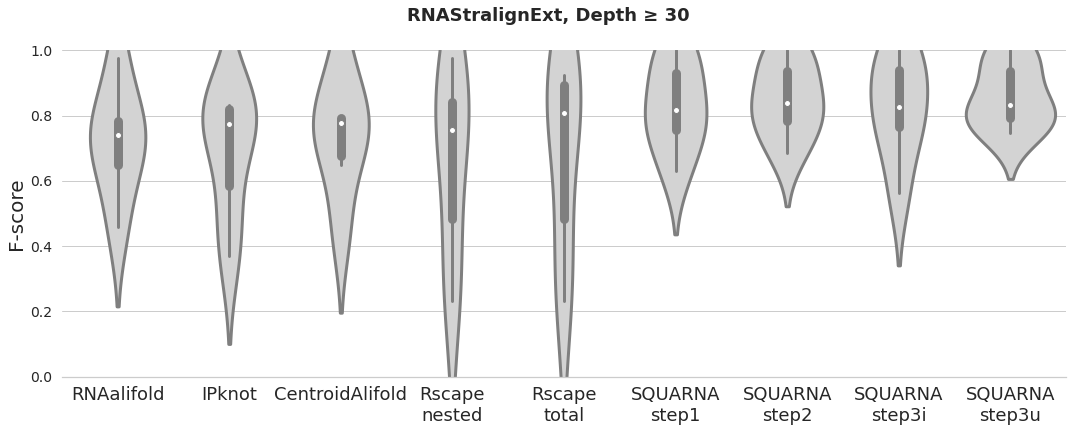

RNAalifold IPknot 0.357 0.7284908793664657
RNAalifold CentroidAlifold -0.143 0.889007599574437
RNAalifold RscapeNested 0.421 0.6823801627170124
RNAalifold RscapeTotal 0.319 0.7564262743018041
RNAalifold SQUARNAs1 -1.17 0.2691071024958675
RNAalifold SQUARNAs2 -1.497 0.16533295676407908
RNAalifold SQUARNAs3i -1.057 0.3154111366543758
RNAalifold SQUARNAs3u -1.686 0.122653511302952
IPknot CentroidAlifold -0.489 0.635588463888902
IPknot RscapeNested 0.143 0.8893587157728104
IPknot RscapeTotal 0.047 0.9637545851644532
IPknot SQUARNAs1 -1.487 0.1679359305125716
IPknot SQUARNAs2 -1.803 0.10162745808531706
IPknot SQUARNAs3i -1.367 0.20155368692971107
IPknot SQUARNAs3u -1.985 0.07527137952790801
CentroidAlifold RscapeNested 0.523 0.6120995242438056
CentroidAlifold RscapeTotal 0.42 0.6832031467872745
CentroidAlifold SQUARNAs1 -0.994 0.3437337131247796
CentroidAlifold SQUARNAs2 -1.304 0.22157398369582418
CentroidAlifold SQUARNAs3i -0.894 0.3925693797663006
CentroidAlifold SQUARNAs3u -1.48 0.169632

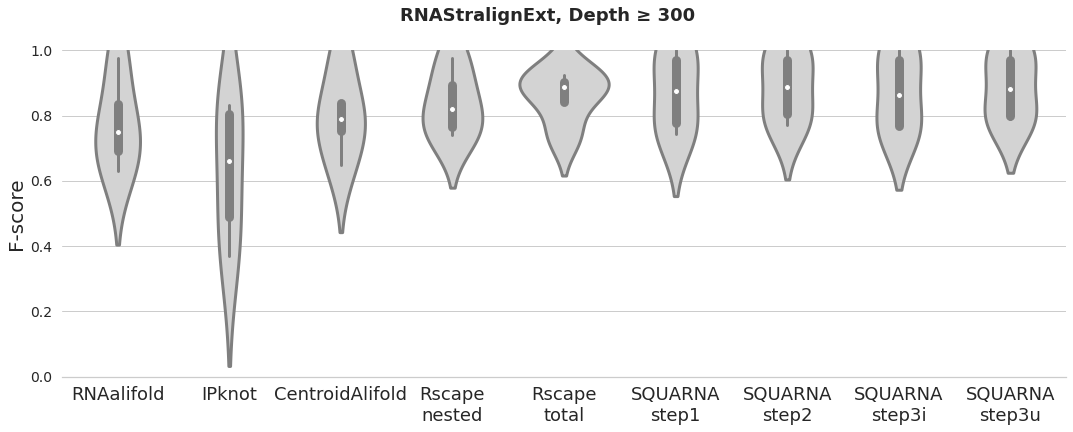

RNAalifold IPknot 1.09 0.3174253472174025
RNAalifold CentroidAlifold -0.25 0.8112429998862793
RNAalifold RscapeNested -0.688 0.5169098011054964
RNAalifold RscapeTotal -0.981 0.36437067496437786
RNAalifold SQUARNAs1 -0.998 0.35686824104626813
RNAalifold SQUARNAs2 -1.206 0.2732671328977345
RNAalifold SQUARNAs3i -0.999 0.3565802052942225
RNAalifold SQUARNAs3u -1.212 0.2710506736201032
IPknot CentroidAlifold -1.313 0.23714257920749088
IPknot RscapeNested -1.693 0.14130445557701687
IPknot RscapeTotal -1.934 0.10131433512638024
IPknot SQUARNAs1 -1.902 0.10591152736902852
IPknot SQUARNAs2 -2.074 0.08337370985767632
IPknot SQUARNAs3i -1.903 0.10567609810430051
IPknot SQUARNAs3u -2.08 0.08269278367694137
CentroidAlifold RscapeNested -0.44 0.6755698061825047
CentroidAlifold RscapeTotal -0.736 0.4897679290043695
CentroidAlifold SQUARNAs1 -0.78 0.46483289552142326
CentroidAlifold SQUARNAs2 -0.991 0.3599602066980581
CentroidAlifold SQUARNAs3i -0.78 0.4647885846578501
CentroidAlifold SQUARNAs3u -0.9

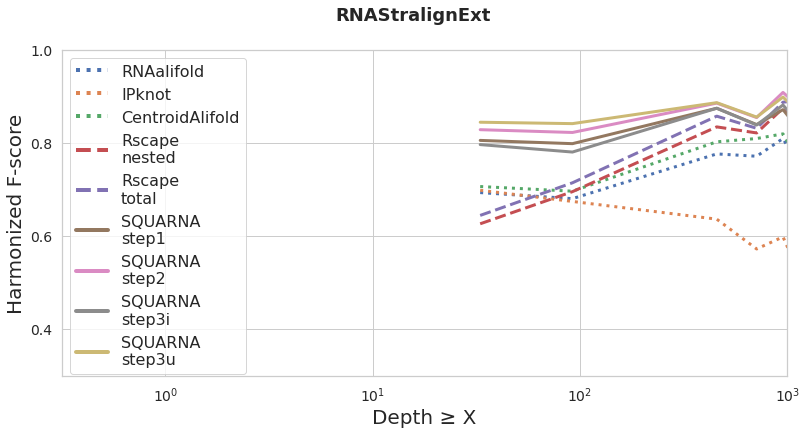

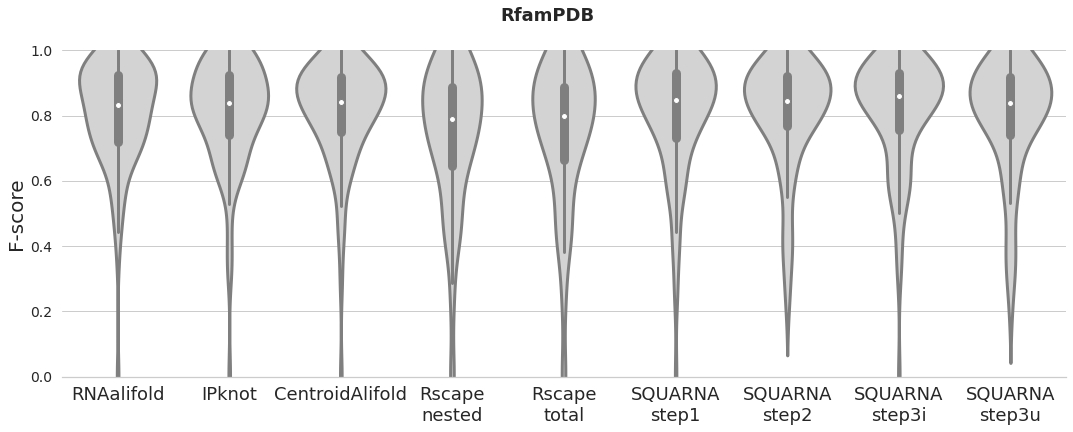

RNAalifold IPknot 0.01 0.9921347831983958
RNAalifold CentroidAlifold -0.076 0.939460321031536
RNAalifold RscapeNested 2.791 0.00571730090800588
RNAalifold RscapeTotal 2.482 0.013812744134514571
RNAalifold SQUARNAs1 0.243 0.8078667239743628
RNAalifold SQUARNAs2 0.331 0.7412673764558666
RNAalifold SQUARNAs3i -0.077 0.9387779239203077
RNAalifold SQUARNAs3u 0.774 0.4395858375455687
IPknot CentroidAlifold -0.085 0.9325320859912718
IPknot RscapeNested 2.753 0.006394912860921019
IPknot RscapeTotal 2.448 0.015159903091557497
IPknot SQUARNAs1 0.231 0.8175663839797837
IPknot SQUARNAs2 0.317 0.7519153461158423
IPknot SQUARNAs3i -0.085 0.932102287578298
IPknot SQUARNAs3u 0.755 0.4512686293300926
CentroidAlifold RscapeNested 2.855 0.0047100417342036405
CentroidAlifold RscapeTotal 2.546 0.011577878197019218
CentroidAlifold SQUARNAs1 0.315 0.7531555416626523
CentroidAlifold SQUARNAs2 0.404 0.6868617437495277
CentroidAlifold SQUARNAs3i -0.004 0.9968064898357147
CentroidAlifold SQUARNAs3u 0.846 0.39842

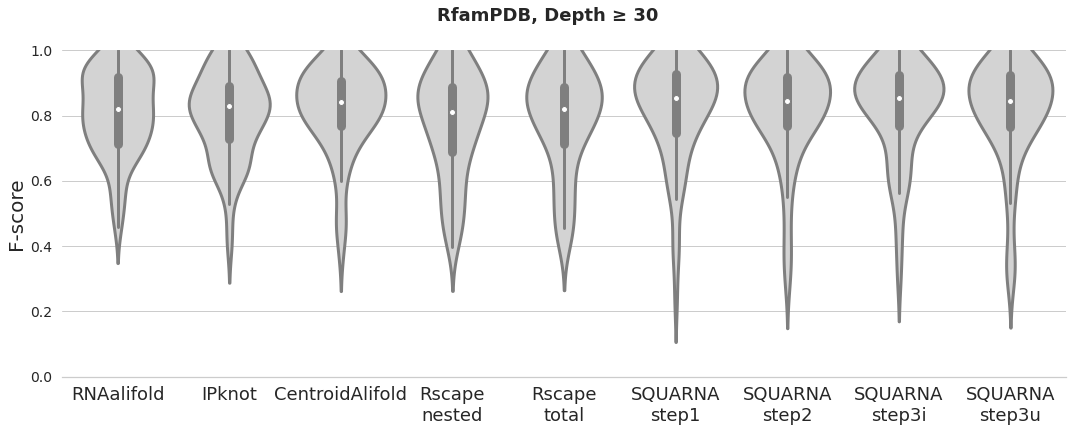

RNAalifold IPknot 0.387 0.6995290134478647
RNAalifold CentroidAlifold -0.408 0.6835608829493629
RNAalifold RscapeNested 1.476 0.1421386323561299
RNAalifold RscapeTotal 0.968 0.33477852990903434
RNAalifold SQUARNAs1 -0.296 0.7677995428331464
RNAalifold SQUARNAs2 -0.084 0.9330481416798968
RNAalifold SQUARNAs3i -0.368 0.713452649042108
RNAalifold SQUARNAs3u -0.08 0.9366341733907257
IPknot CentroidAlifold -0.782 0.4351752904993611
IPknot RscapeNested 1.114 0.26705308297968317
IPknot RscapeTotal 0.609 0.5436649529006878
IPknot SQUARNAs1 -0.64 0.5233508195988239
IPknot SQUARNAs2 -0.436 0.6636975474625668
IPknot SQUARNAs3i -0.719 0.47323372149566045
IPknot SQUARNAs3u -0.422 0.6737431939888852
CentroidAlifold RscapeNested 1.818 0.0709984608708225
CentroidAlifold RscapeTotal 1.321 0.18862229388994517
CentroidAlifold SQUARNAs1 0.076 0.9397986356660777
CentroidAlifold SQUARNAs2 0.29 0.7725002199137407
CentroidAlifold SQUARNAs3i 0.014 0.989192194730961
CentroidAlifold SQUARNAs3u 0.284 0.7767259982

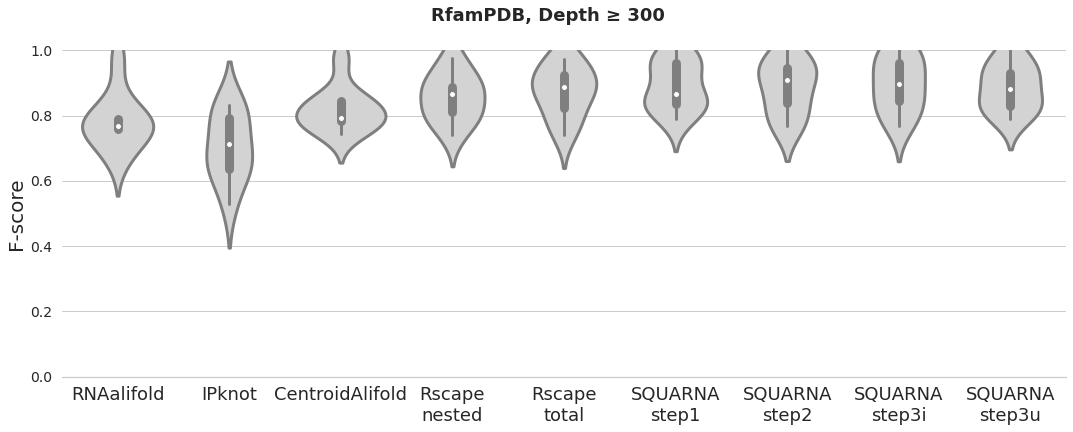

RNAalifold IPknot 1.81 0.0891258161944009
RNAalifold CentroidAlifold -0.973 0.3451866946321591
RNAalifold RscapeNested -1.86 0.08141755638959537
RNAalifold RscapeTotal -2.287 0.036167376540148996
RNAalifold SQUARNAs1 -2.777 0.013458166848994901
RNAalifold SQUARNAs2 -2.506 0.023376006646923384
RNAalifold SQUARNAs3i -2.702 0.01569967153102492
RNAalifold SQUARNAs3u -2.68 0.016423537383181995
IPknot CentroidAlifold -2.85 0.011589396198687697
IPknot RscapeNested -3.604 0.0023777141678831214
IPknot RscapeTotal -3.963 0.0011153015898597988
IPknot SQUARNAs1 -4.425 0.0004242632989717643
IPknot SQUARNAs2 -4.129 0.0007871297593497527
IPknot SQUARNAs3i -4.298 0.000552393893186791
IPknot SQUARNAs3u -4.36 0.00048582912664303423
CentroidAlifold RscapeNested -1.043 0.31252440742098664
CentroidAlifold RscapeTotal -1.542 0.1426087536927492
CentroidAlifold SQUARNAs1 -2.088 0.053148699268204654
CentroidAlifold SQUARNAs2 -1.805 0.08986408968579909
CentroidAlifold SQUARNAs3i -2.029 0.059458424023519446
Cent

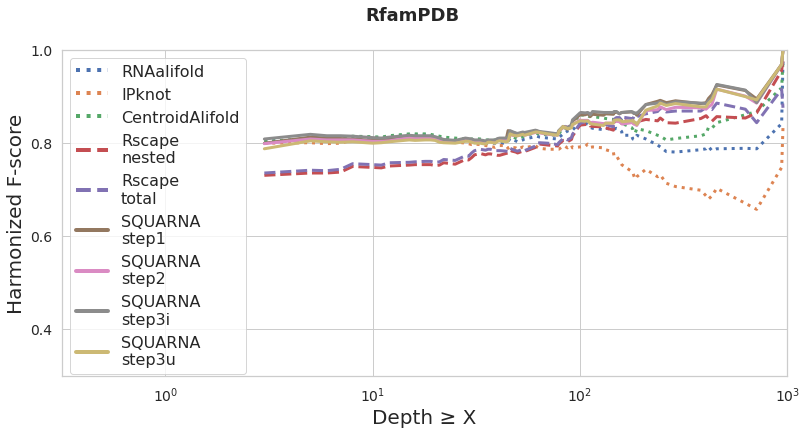

In [25]:
#alignment-based violins
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats

def FScore(tp,fp,fn):
    if not tp+fp+fn:
        return 1, 1, 1
    return round(2*tp / (2*tp+fp+fn),3), round(tp / (tp+fp),3) if (tp+fp) else 1, round(tp / (tp+fn),3) if (tp+fn) else 1

def Harmonized(fs1,fs2):
    return round(2*fs1*fs2/(fs1+fs2),3)

for dataset in ("RNAStralignExt","RfamPDB"):# "Rfam14.9", "RfamPDB",):
     
    tools = "RNAalifold IPknot CentroidAlifold RscapeNested RscapeTotal SQUARNAs1 SQUARNAs2 SQUARNAs3i SQUARNAs3u".split(' ') 
    
    labels = ["RNAalifold","IPknot",
              "CentroidAlifold","Rscape\nnested","Rscape\ntotal",
              "SQUARNA\nstep1","SQUARNA\nstep2","SQUARNA\nstep3i","SQUARNA\nstep3u",]
    
    #tools = "RNAalifold IPknot CentroidAlifold RscapeNested RscapeTotal SQUARNAs1 SQUARNAs2 SQUARNAs3i SQUARNAs3u".split(' ')
    
    #labels = ["RNAalifold","IPknot",
    #          "CentroidAlifold","Rscape\nnested","Rscape\ntotal",
    #          "SQUARNA\nstep1","SQUARNA\nstep2","SQUARNA\nstep3i","SQUARNA\nstep3u"]
    
    res = {}
    resTP = {}
    resFP = {}
    resFN = {}
    res100 = {}
    res10 = {}
    
    for tool in tools:
        
        fscores = []
        fscores10 = []
        fscores100 = []
        tps = []
        fps = []
        fns = []
        depths  = []
        lengths = []
        
        with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines = tsv.readlines()
            title = lines[0].strip().split('\t')
            fsind = title.index("FS")
            dpind = title.index("DEPTH")
            famind = title.index("NAME")
            lnind = title.index("LEN")
            tpind = title.index("TP")
            fpind = title.index("FP")
            fnind = title.index("FN")
            for line in lines[1:]:
                if int(line.strip().split('\t')[lnind]) > 500:
                    continue
                #if line.strip().split('\t')[famind] in fams:
                depths.append(int(line.strip().split('\t')[dpind]))
                if depths[-1]>=30:
                    fscores10.append(float(line.strip().split('\t')[fsind]))
                if depths[-1]>=300:
                    fscores100.append(float(line.strip().split('\t')[fsind]))
                lengths.append(int(line.strip().split('\t')[lnind]))
                fscores.append(float(line.strip().split('\t')[fsind]))
                tps.append(int(line.strip().split('\t')[tpind]))
                fps.append(int(line.strip().split('\t')[fpind]))
                fns.append(int(line.strip().split('\t')[fnind]))
    
        res[tool] = fscores
        res10[tool] = fscores10
        res100[tool] = fscores100
        resTP[tool] = tps
        resFP[tool] = fps
        resFN[tool] = fns
    
    sns.set(style="whitegrid")
    df = pd.DataFrame(res)
    f, ax = plt.subplots(figsize=(18, 6))
    ax.set_ylim([0.0,1.0])
    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)
    sns.despine(left=True)
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    plt.show()
    
    for tool1 in tools:
        for tool2 in tools[tools.index(tool1)+1:]:
            statres = stats.ttest_ind(res[tool1], res[tool2])
            print(tool1, tool2, round(statres.statistic,3), statres.pvalue)
    
    sns.set(style="whitegrid")
    df = pd.DataFrame(res10)
    f, ax = plt.subplots(figsize=(18, 6))
    ax.set_ylim([0.0,1.0])
    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)
    sns.despine(left=True)
    f.suptitle('{}, Depth ≥ 30'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    plt.show()
    
    for tool1 in tools:
        for tool2 in tools[tools.index(tool1)+1:]:
            statres = stats.ttest_ind(res10[tool1], res10[tool2])
            print(tool1, tool2, round(statres.statistic,3), statres.pvalue)
            
    sns.set(style="whitegrid")
    df = pd.DataFrame(res100)
    f, ax = plt.subplots(figsize=(18, 6))
    ax.set_ylim([0.0,1.0])
    # Show each distribution with both violins and points
    sns.violinplot(data=df, inner="box", color='lightgrey', cut=2, linewidth=3)
    sns.despine(left=True)
    f.suptitle('{}, Depth ≥ 300'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylabel("F-score",size = 20)
    ax.set_xticklabels(labels,fontsize=18)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    plt.show()
    
    for tool1 in tools:
        for tool2 in tools[tools.index(tool1)+1:]:
            statres = stats.ttest_ind(res100[tool1], res100[tool2])
            print(tool1, tool2, round(statres.statistic,3),statres.pvalue)
    
    f, ax = plt.subplots(figsize=(13, 6))
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylim([0.3,1.0])
    ax.set_xlim([10**-0.5,1000])
    for k,tool in enumerate(tools):
        nums   = res[tool]
        numsTP = resTP[tool]
        numsFP = resFP[tool]
        numsFN = resFN[tool]
        pairs = [(depths[i], numsTP[i],
                 numsFP[i],numsFN[i],nums[i]) for i in range(len(depths))]
        pairs.sort()
        dat = {}
        for i in range(len(pairs)):
            dat[pairs[i][0]] = Harmonized(FScore(sum([p[1] for p in pairs[i:]]),
                                      sum([p[2] for p in pairs[i:]]),
                                      sum([p[3] for p in pairs[i:]]))[0],
                                          np.mean([p[4] for p in pairs[i:]]))
                                          
        dat = sorted(dat.items())
        xx  = [d[0] for d in dat]
        yy  = [d[1] for d in dat]
        if tool.startswith('Rscape'):
            ax.plot(xx,yy,label=labels[k], linewidth=3, ls='--')
        elif tool.startswith("SQUARNA"):
            ax.plot(xx,yy,label=labels[k], linewidth=3)
        else:
            ax.plot(xx,yy,label=labels[k], linewidth=3, ls=':')
    # get the legend object
    leg = ax.legend(fontsize=16)

    # change the line width for the legend
    for line in leg.get_lines():
        line.set_linewidth(4)
    ax.set_ylabel("Harmonized F-score", fontsize=20)
    ax.set_xlabel("Depth ≥ X", fontsize=20)
    ax.set_yticks([0.4,0.6,0.8,1.0],
                  labels=[0.4,0.6,0.8,1.0], size=14)
    ax.set_xticks([1,10,100,1000],
                  labels=[1,10,100,1000], size=14)
    ax.set_xscale("log")
    plt.show()

In [ ]:
# saved just in case
    f, ax = plt.subplots(figsize=(10, 6))
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylim([0.0,1.0])
    ax.set_xlim([2,2000])
    for k,tool in enumerate(tools):
        nums = res[tool]
        pairs = [(depths[i], nums[i]) for i in range(len(depths))]
        pairs.sort()
        dat = {}
        for i in range(len(pairs)):
            dat[pairs[i][0]] = np.mean([p[1] for p in pairs[:i+1]])
        dat = sorted(dat.items())
        xx  = [d[0] for d in dat]
        yy  = [d[1] for d in dat]
        ax.plot(xx,yy,label=labels[k], linewidth=2)
    plt.legend(fontsize=16)
    ax.set_ylabel("Mean F-score", fontsize=20)
    ax.set_xlabel("Depth ≤ X", fontsize=20)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    ax.set_xticks([10,100,1000],
                  labels=[10,100,1000], size=14)
    ax.set_xscale("log")
    plt.show()
    
    f, ax = plt.subplots(figsize=(10, 6))
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylim([0.0,1.0])
    ax.set_xlim([2,2000])
    for k,tool in enumerate(tools):
        nums = res[tool]
        pairs = [(depths[i], nums[i]) for i in range(len(depths))]
        pairs.sort()
        dat = {}
        for i in range(len(pairs)):
            dat[pairs[i][0]] = np.mean([p[1] for p in pairs[i:]])
        dat = sorted(dat.items())
        xx  = [d[0] for d in dat]
        yy  = [d[1] for d in dat]
        ax.plot(xx,yy,label=labels[k], linewidth=2)
    plt.legend(fontsize=16)
    ax.set_ylabel("Mean F-score", fontsize=20)
    ax.set_xlabel("Depth ≥ X", fontsize=20)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    ax.set_xticks([10,100,1000],
                  labels=[10,100,1000], size=14)
    ax.set_xscale("log")
    plt.show()

    
    f, ax = plt.subplots(figsize=(10, 6))
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylim([0.0,1.0])
    ax.set_xlim([2,2000])
    for k,tool in enumerate(tools):
        numsTP = resTP[tool]
        numsFP = resFP[tool]
        numsFN = resFN[tool]
        pairs = [(depths[i], numsTP[i],
                 numsFP[i],numsFN[i],) for i in range(len(depths))]
        pairs.sort()
        dat = {}
        for i in range(len(pairs)):
            dat[pairs[i][0]] = FScore(sum([p[1] for p in pairs[:i+1]]),
                                      sum([p[2] for p in pairs[:i+1]]),
                                      sum([p[3] for p in pairs[:i+1]]))[0]
        dat = sorted(dat.items())
        xx  = [d[0] for d in dat]
        yy  = [d[1] for d in dat]
        ax.plot(xx,yy,label=labels[k], linewidth=2)
    plt.legend(fontsize=16)
    ax.set_ylabel("Total F-score", fontsize=20)
    ax.set_xlabel("Depth ≤ X", fontsize=20)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    ax.set_xticks([10,100,1000],
                  labels=[10,100,1000], size=14)
    ax.set_xscale("log")
    plt.show()
    
    f, ax = plt.subplots(figsize=(10, 6))
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylim([0.0,1.0])
    ax.set_xlim([2,2000])
    for k,tool in enumerate(tools):
        numsTP = resTP[tool]
        numsFP = resFP[tool]
        numsFN = resFN[tool]
        pairs = [(depths[i], numsTP[i],
                 numsFP[i],numsFN[i],) for i in range(len(depths))]
        pairs.sort()
        dat = {}
        for i in range(len(pairs)):
            dat[pairs[i][0]] = FScore(sum([p[1] for p in pairs[i:]]),
                                      sum([p[2] for p in pairs[i:]]),
                                      sum([p[3] for p in pairs[i:]]))[0]
        dat = sorted(dat.items())
        xx  = [d[0] for d in dat]
        yy  = [d[1] for d in dat]
        ax.plot(xx,yy,label=labels[k], linewidth=2)
    plt.legend(fontsize=16)
    ax.set_ylabel("Total F-score", fontsize=20)
    ax.set_xlabel("Depth ≥ X", fontsize=20)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    ax.set_xticks([10,100,1000],
                  labels=[10,100,1000], size=14)
    ax.set_xscale("log")
    plt.show()
    
    f, ax = plt.subplots(figsize=(10, 6))
    f.suptitle('{}'.format(dataset), fontsize=18, fontweight='bold')
    ax.set_ylim([0.0,1.0])
    ax.set_xlim([2,2000])
    for k,tool in enumerate(tools):
        nums   = res[tool]
        numsTP = resTP[tool]
        numsFP = resFP[tool]
        numsFN = resFN[tool]
        pairs = [(depths[i], numsTP[i],
                 numsFP[i],numsFN[i],nums[i]) for i in range(len(depths))]
        pairs.sort()
        dat = {}
        for i in range(len(pairs)):
            dat[pairs[i][0]] = Harmonized(FScore(sum([p[1] for p in pairs[:i+1]]),
                                      sum([p[2] for p in pairs[:i+1]]),
                                      sum([p[3] for p in pairs[:i+1]]))[0],
                                          np.mean([p[4] for p in pairs[:i+1]]))
                                          
        dat = sorted(dat.items())
        xx  = [d[0] for d in dat]
        yy  = [d[1] for d in dat]
        ax.plot(xx,yy,label=labels[k], linewidth=2)
    plt.legend(fontsize=16)
    ax.set_ylabel("Harmonized F-score", fontsize=20)
    ax.set_xlabel("Depth ≤ X", fontsize=20)
    ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                  labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    ax.set_xticks([10,100,1000],
                  labels=[10,100,1000], size=14)
    ax.set_xscale("log")
    plt.show()

In [31]:
# for summary_ali.xlsx
import numpy as np

def FScore(tp,fp,fn):
    if not tp+fp+fn:
        return 1, 1, 1
    return round(2*tp / (2*tp+fp+fn),3), round(tp / (tp+fp),3) if (tp+fp) else 1, round(tp / (tp+fn),3) if (tp+fn) else 1

dataset = "Rfam14.9"
tool = "SQUARNAs1"

for depthlim in (0, 30, 300):
    
    print(depthlim)

    data = []

    tim = 0

    with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines  = tsv.readlines()
            title  = lines[0].strip().split('\t')
            fsind  = title.index("FS")
            prcind = title.index("PRC")
            rclind = title.index("RCL")
            dpind  = title.index("DEPTH")
            tpind  = title.index("TP")
            fpind  = title.index("FP")
            fnind  = title.index("FN")
            tind   = title.index("TIME")
            for line in lines[1:]:
                linesplit = line.strip().split('\t')
                depth = int(linesplit[dpind])
                tim = linesplit[tind]
                if depth >= depthlim:
                    data.append([int(linesplit[tpind]),
                                 int(linesplit[fpind]),
                                 int(linesplit[fnind]),
                                 float(linesplit[fsind]),
                                 float(linesplit[prcind]),
                                 float(linesplit[rclind]),])

    print("Total FS PRC RCL", FScore(sum(d[0] for d in data),
                                     sum(d[1] for d in data),
                                     sum(d[2] for d in data)))
    print("Mean  FS PRC RCL", (round(np.mean([d[3] for d in data]),3),
                             round(np.mean([d[4] for d in data]),3),
                             round(np.mean([d[5] for d in data]),3)))
    if not depthlim:
        print("Time", tim+" sec")

0
Total FS PRC RCL (0.6, 0.601, 0.599)
Mean  FS PRC RCL (0.569, 0.577, 0.677)
Time 1482.445 sec
30
Total FS PRC RCL (0.762, 0.778, 0.747)
Mean  FS PRC RCL (0.777, 0.763, 0.836)
300
Total FS PRC RCL (0.858, 0.86, 0.855)
Mean  FS PRC RCL (0.839, 0.835, 0.854)


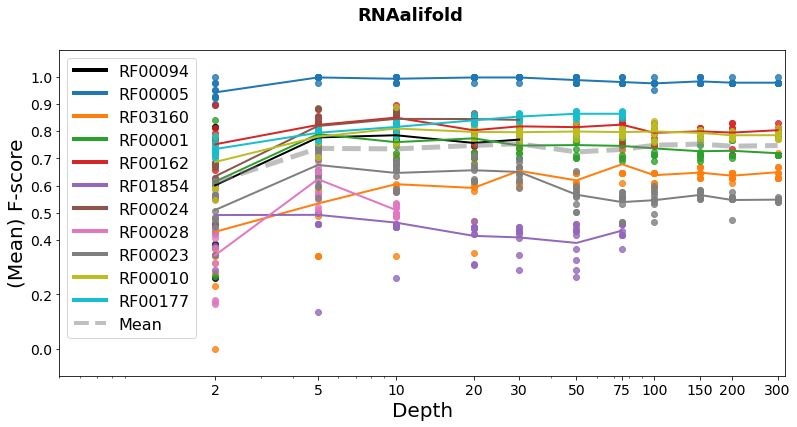

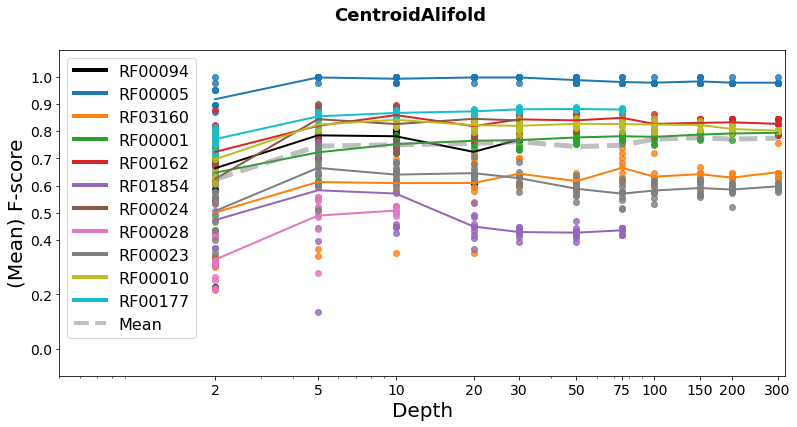

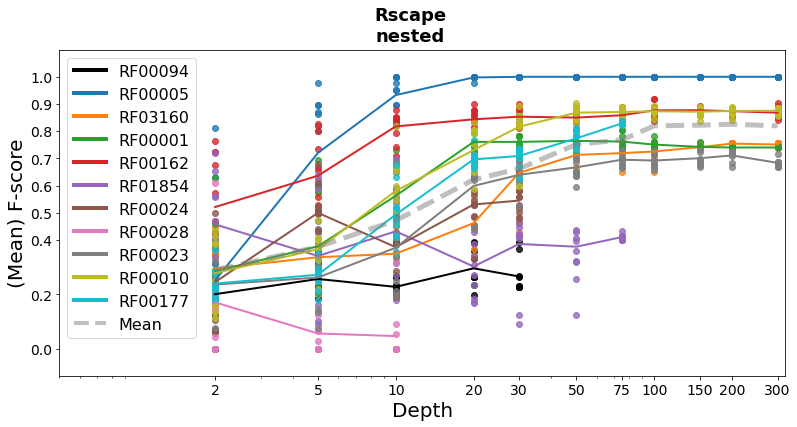

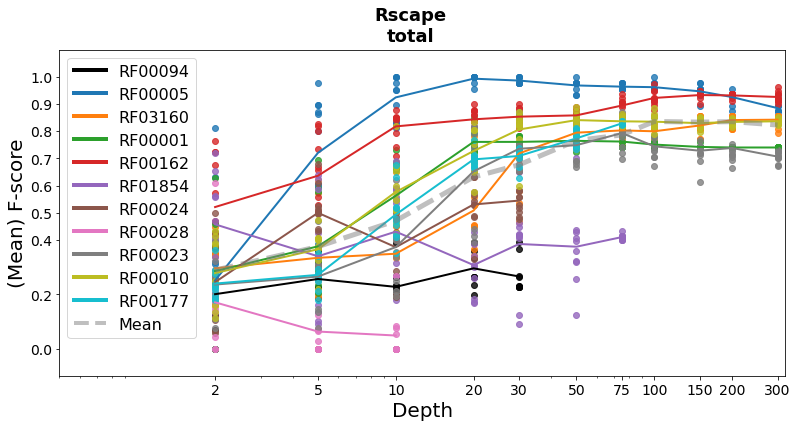

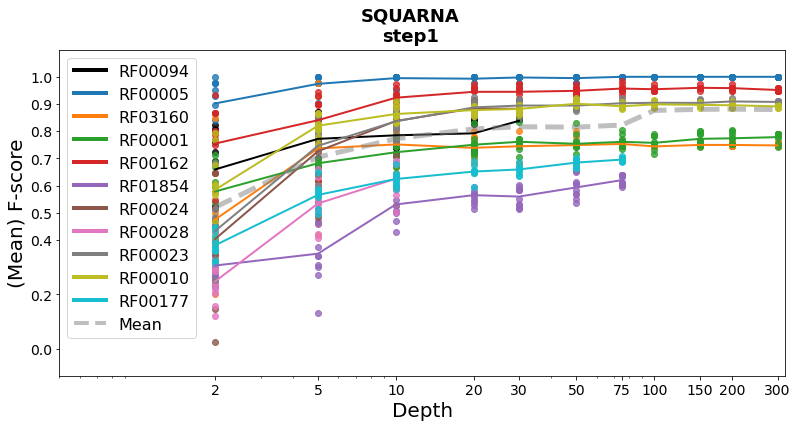

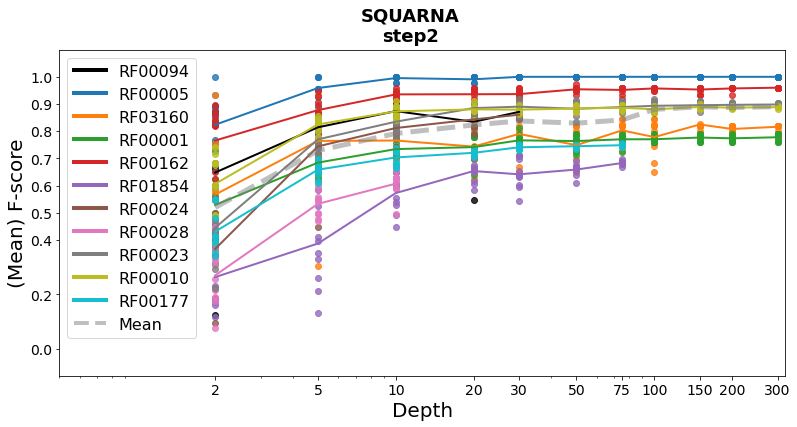

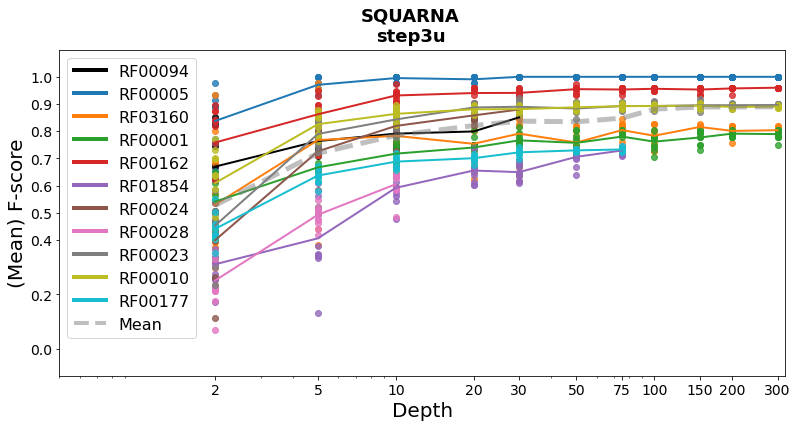

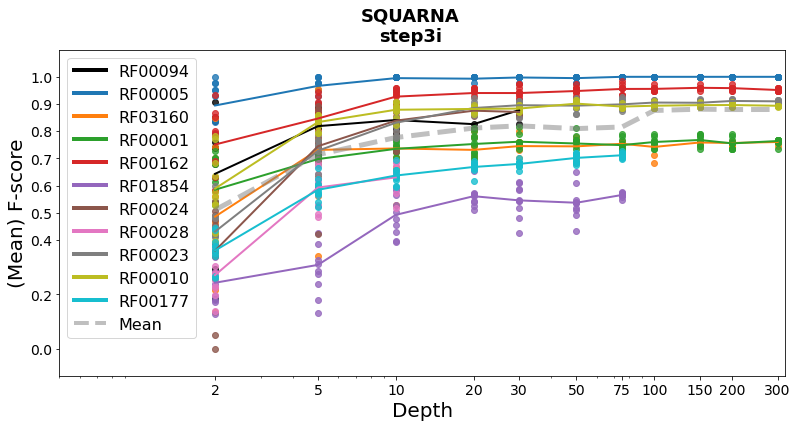

RNAalifold [0.613, 0.737, 0.735, 0.748, 0.754, 0.724, 0.733, 0.748, 0.753, 0.745, 0.747]
CentroidAlifold [0.623, 0.745, 0.75, 0.755, 0.762, 0.743, 0.748, 0.77, 0.776, 0.771, 0.775]
RscapeNested [0.289, 0.375, 0.471, 0.622, 0.662, 0.751, 0.768, 0.82, 0.822, 0.826, 0.82]
RscapeTotal [0.289, 0.375, 0.471, 0.631, 0.676, 0.765, 0.786, 0.836, 0.833, 0.835, 0.823]
SQUARNAs1 [0.52, 0.704, 0.772, 0.808, 0.816, 0.815, 0.823, 0.876, 0.88, 0.881, 0.879]
SQUARNAs2 [0.519, 0.729, 0.792, 0.823, 0.838, 0.83, 0.841, 0.88, 0.89, 0.887, 0.89]
SQUARNAs3u [0.527, 0.719, 0.784, 0.82, 0.837, 0.835, 0.848, 0.881, 0.889, 0.889, 0.89]
SQUARNAs3i [0.51, 0.714, 0.777, 0.811, 0.82, 0.809, 0.815, 0.876, 0.881, 0.88, 0.88]


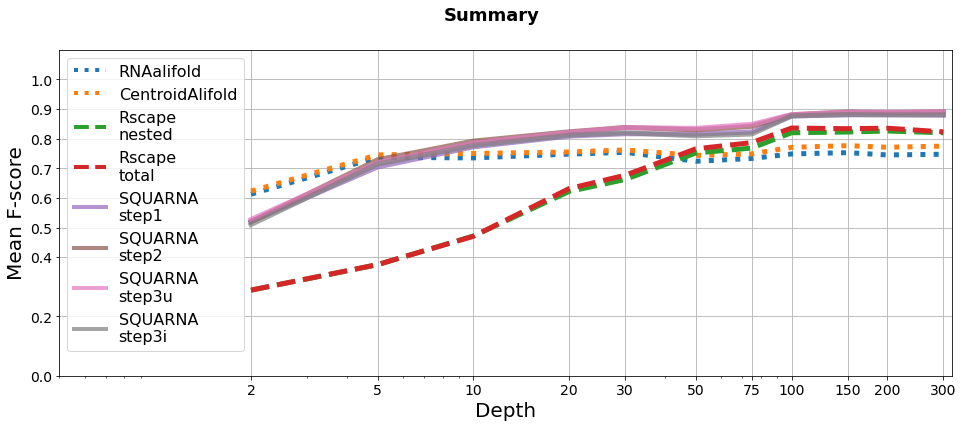

In [8]:
# For SubAli graphs
import numpy as np
import matplotlib.pyplot as plt

dataset = "SubAli"

labels = {"RNAalifold":"RNAalifold",
          "SQUARNAs1":"SQUARNA\nstep1",
          "RscapeTotal":"Rscape\ntotal",
          "RscapeNested":"Rscape\nnested",
          "IPknot":"IPknot",
          "CentroidAlifold":"CentroidAlifold",
          "SQUARNAs2":"SQUARNA\nstep2",
          "SQUARNAs3i":"SQUARNA\nstep3i",
          "SQUARNAs3u":"SQUARNA\nstep3u",}

tools = "RNAalifold CentroidAlifold RscapeNested RscapeTotal SQUARNAs1 SQUARNAs2 SQUARNAs3u SQUARNAs3i".split(' ') 


depths = [2,5,10,20,30,50,75,100,150,200,300]
dd = {depths[i]:i for i in range(len(depths))}

totalY = {}

for tool in tools:# 



    fams = {}

    with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines  = tsv.readlines()
            title  = lines[0].strip().split('\t')
            fsind  = title.index("FS")
            dpind  = title.index("DEPTH")
            famind = title.index("NAME")
            for line in lines[1:]:
                linesplit = line.strip().split('\t')
                fam = linesplit[famind].split("_")[0]
                if fam not in fams:
                    fams[fam] = {}
                depth  = int(linesplit[dpind])
                fscore = float(linesplit[fsind])
                if depth not in fams[fam]:
                    fams[fam][depth] = []
                fams[fam][depth].append(fscore)

    f, ax = plt.subplots(figsize=(13, 6))
    f.suptitle('{}'.format(labels[tool]), fontsize=18, fontweight='bold')
    ax.set_ylim([-0.1,1.1])
    ax.set_xlim([0.5,320])

    YY = [[] for _ in depths]
    
    for fam in fams:

        xx = [d for d in depths if d in fams[fam]]
        yy = [np.mean(fams[fam][_]) for _ in xx]
        
        for k,_ in enumerate(yy):
            YY[dd[xx[k]]].append(_)

        dots = [(dp,fs) for dp in fams[fam] for fs in fams[fam][dp]]

        if fam=="RF00094":
            plt.plot(xx,yy, label = fam, color='k', linewidth=2)
            plt.scatter([d[0] for d in dots],[d[1] for d in dots],color='k',alpha=0.8)
        else:
            plt.plot(xx,yy, label = fam, linewidth=2)
            plt.scatter([d[0] for d in dots],[d[1] for d in dots],alpha=0.8)

            
    plt.plot(depths,[np.mean(_) for _ in YY],linewidth=5,ls="--", color="gray", alpha=0.5, label="Mean")
    
    totalY[tool] = [np.mean(_) for _ in YY]
    # get the legend object
    leg = ax.legend(fontsize=16)

    # change the line width for the legend
    for line in leg.get_lines():
        line.set_linewidth(4)
    ax.set_ylabel("(Mean) F-score", fontsize=20)
    ax.set_xlabel("Depth", fontsize=20)
    ax.set_yticks([0.0,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                    labels=[0.0,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0], size=14)
    ax.set_xscale("log")
    ax.set_xticks([2,5,10,20,30,50,75,100,150,200,300],
                    labels=[2,5,10,20,30,50,75,100,150,200,300], size=14)
    plt.show()
    
f, ax = plt.subplots(figsize=(16, 6))
f.suptitle('Summary', fontsize=18, fontweight='bold')
ax.set_ylim([-0.00001,1.1])
ax.set_xlim([0.5,320])
            
for tool in tools:
    print(tool,[round(g,3) for g in totalY[tool]])
    if tool.startswith('Rscape'):
        plt.plot(depths,totalY[tool],linewidth=5, label=labels[tool], ls='--')
    elif tool.startswith("SQUARNA"):
        plt.plot(depths,totalY[tool],linewidth=5, label=labels[tool], alpha=0.7)
    else:
        plt.plot(depths,totalY[tool],linewidth=5, label=labels[tool], ls=':')
    
# get the legend object
leg = ax.legend(fontsize=16)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4)
ax.set_ylabel("Mean F-score", fontsize=20)
ax.set_xlabel("Depth", fontsize=20)
ax.set_yticks([0.0,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                labels=[0.0,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0], size=14)
ax.set_xscale("log")
ax.set_xticks([2,5,10,20,30,50,75,100,150,200,300],
                labels=[2,5,10,20,30,50,75,100,150,200,300], size=14)
plt.grid()
plt.show()

RNAalifold 5 -0.17
CentroidAlifold 5 -0.264
RscapeNested 5 0.157
RscapeTotal 5 0.144
SQUARNAs1 5 -0.293
SQUARNAs2 5 -0.37


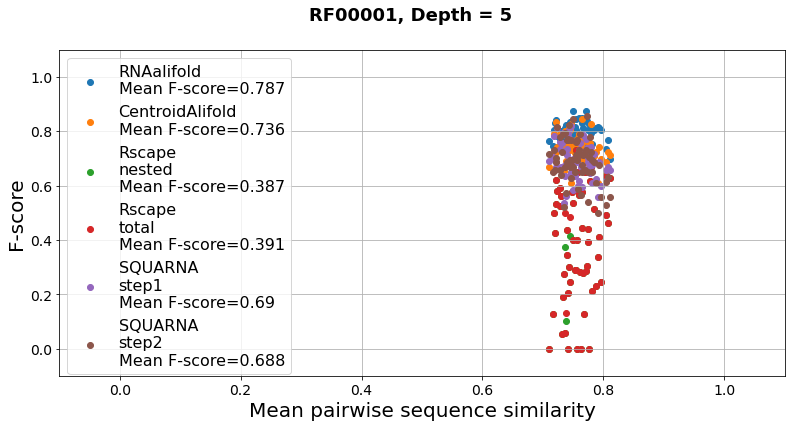

RNAalifold 10 0.311
CentroidAlifold 10 -0.037
RscapeNested 10 0.054
RscapeTotal 10 0.054
SQUARNAs1 10 -0.435
SQUARNAs2 10 -0.406


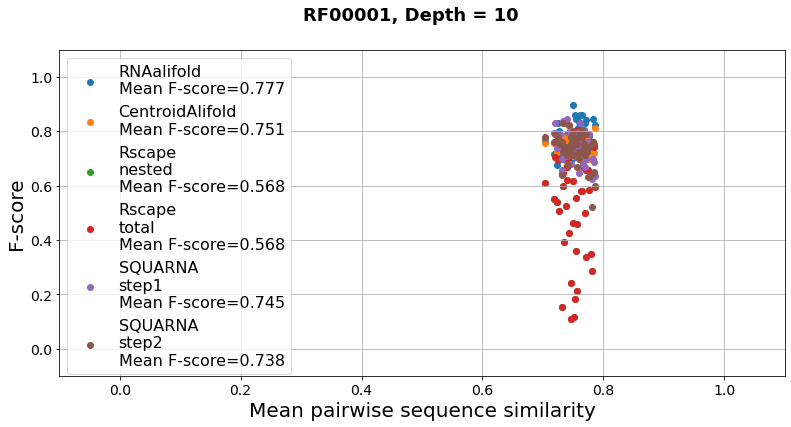

RNAalifold 20 0.081
CentroidAlifold 20 -0.311
RscapeNested 20 -0.052
RscapeTotal 20 -0.041
SQUARNAs1 20 -0.186
SQUARNAs2 20 -0.071


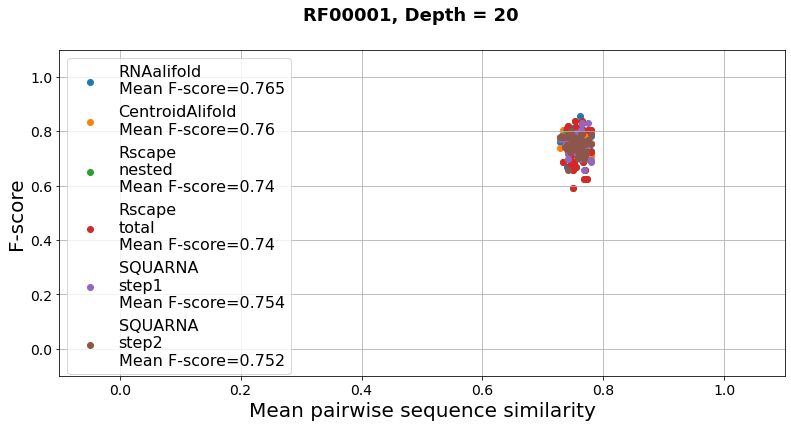

RNAalifold 5 0.257
CentroidAlifold 5 0.188
RscapeNested 5 0.066
RscapeTotal 5 0.066
SQUARNAs1 5 0.092
SQUARNAs2 5 0.291


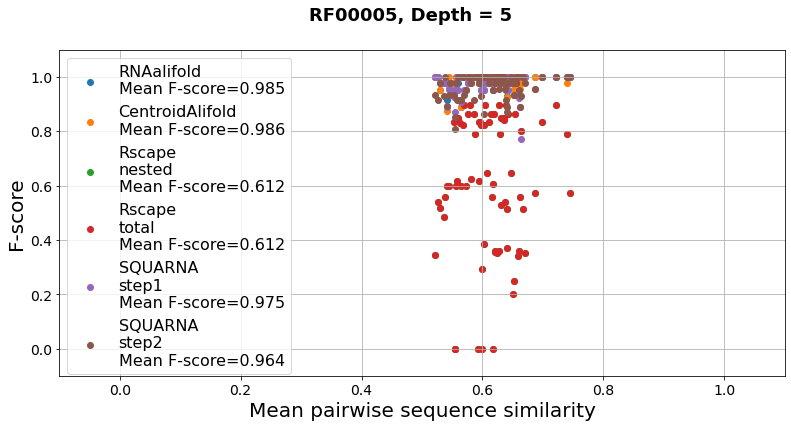

RNAalifold 10 0.305
CentroidAlifold 10 0.311
RscapeNested 10 -0.169
RscapeTotal 10 -0.167
SQUARNAs1 10 0.148
SQUARNAs2 10 0.309


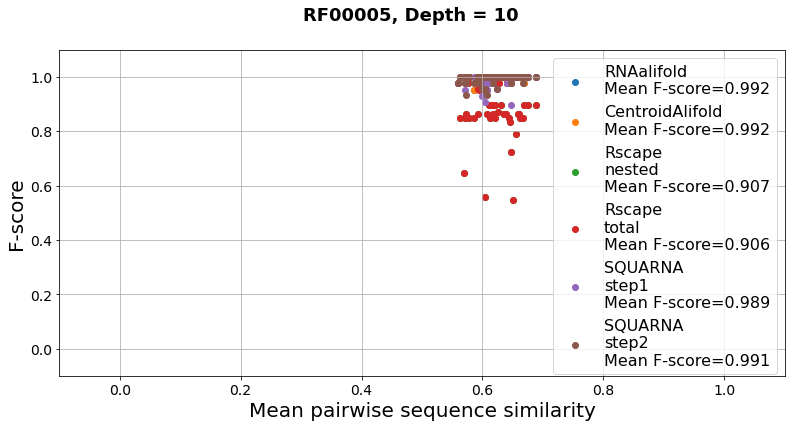

RNAalifold 20 0.349
CentroidAlifold 20 0.349
RscapeNested 20 -0.04
RscapeTotal 20 0.057
SQUARNAs1 20 0.257
SQUARNAs2 20 0.153


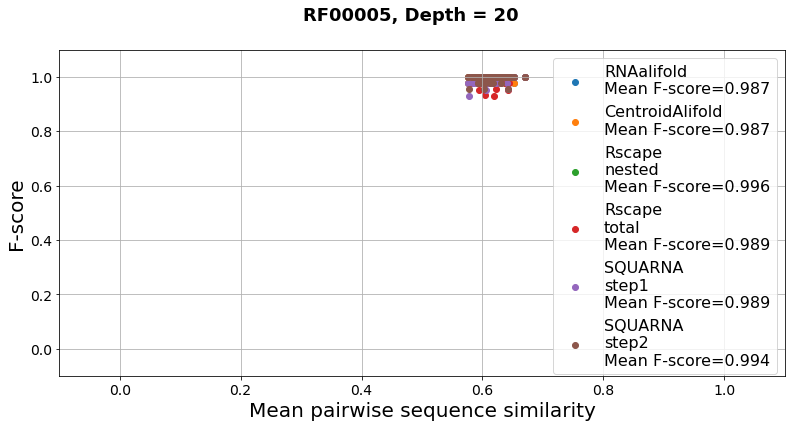

RNAalifold 5 -0.042
CentroidAlifold 5 -0.287
RscapeNested 5 0.18
RscapeTotal 5 0.174
SQUARNAs1 5 -0.105
SQUARNAs2 5 -0.024


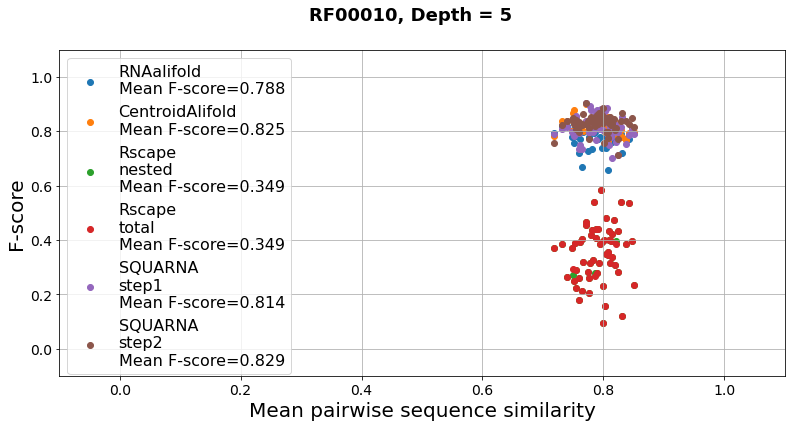

RNAalifold 10 0.004
CentroidAlifold 10 0.039
RscapeNested 10 0.289
RscapeTotal 10 0.289
SQUARNAs1 10 -0.032
SQUARNAs2 10 -0.299


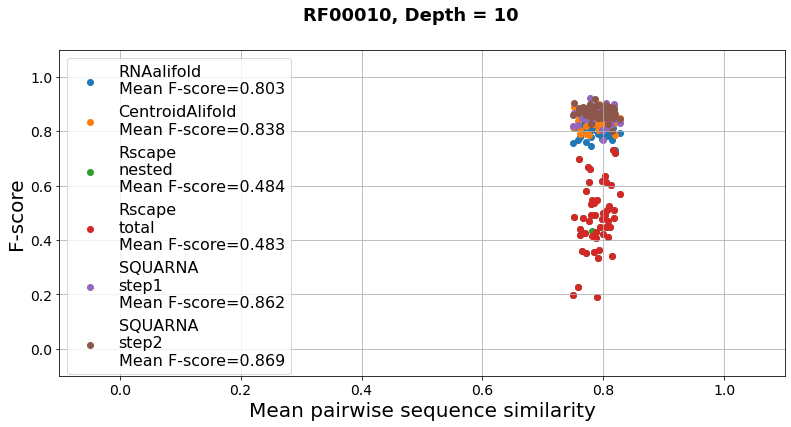

RNAalifold 20 -0.236
CentroidAlifold 20 0.079
RscapeNested 20 -0.022
RscapeTotal 20 0.039
SQUARNAs1 20 0.226
SQUARNAs2 20 0.282


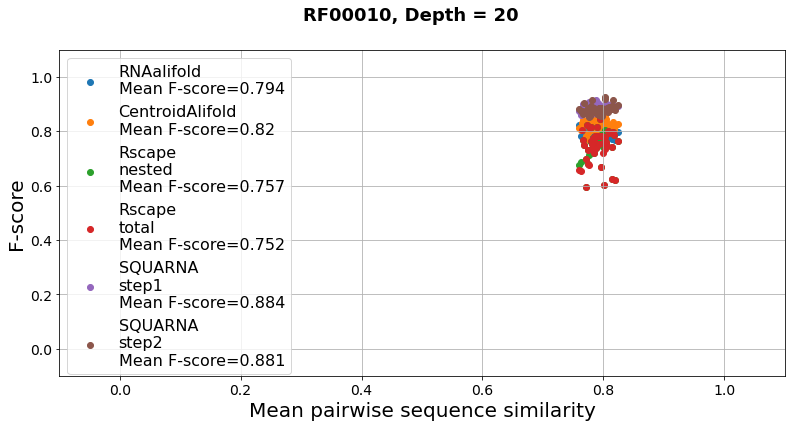

RNAalifold 5 0.277
CentroidAlifold 5 0.174
RscapeNested 5 -0.069
RscapeTotal 5 -0.068
SQUARNAs1 5 -0.432
SQUARNAs2 5 -0.429


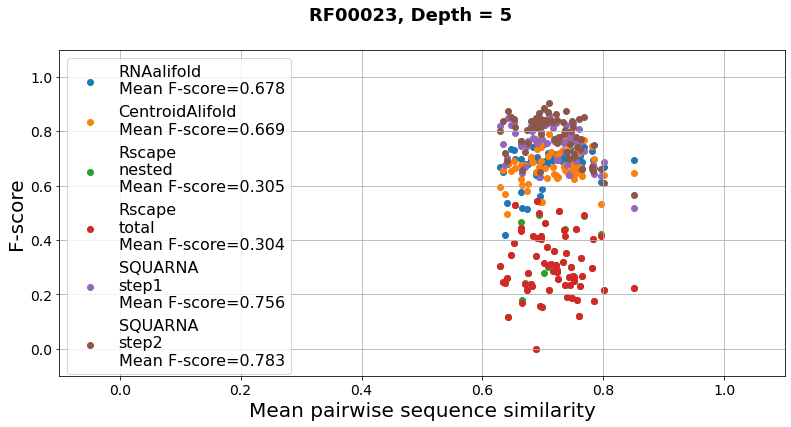

RNAalifold 10 -0.058
CentroidAlifold 10 0.143
RscapeNested 10 0.018
RscapeTotal 10 0.048
SQUARNAs1 10 -0.344
SQUARNAs2 10 -0.217


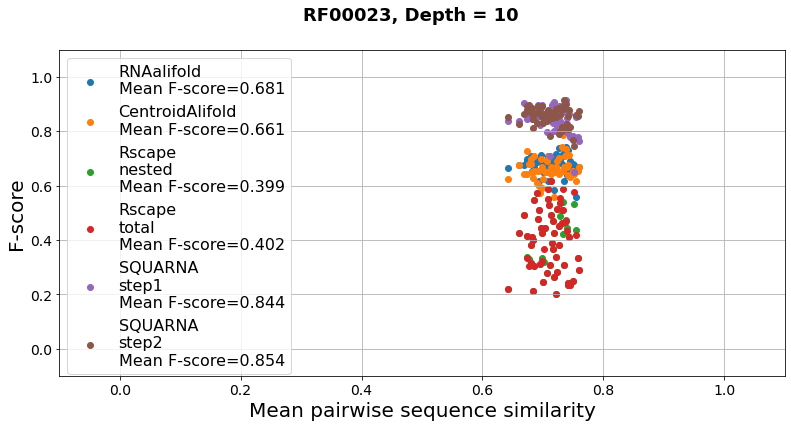

RNAalifold 20 0.235
CentroidAlifold 20 0.282
RscapeNested 20 -0.236
RscapeTotal 20 -0.221
SQUARNAs1 20 -0.343
SQUARNAs2 20 -0.216


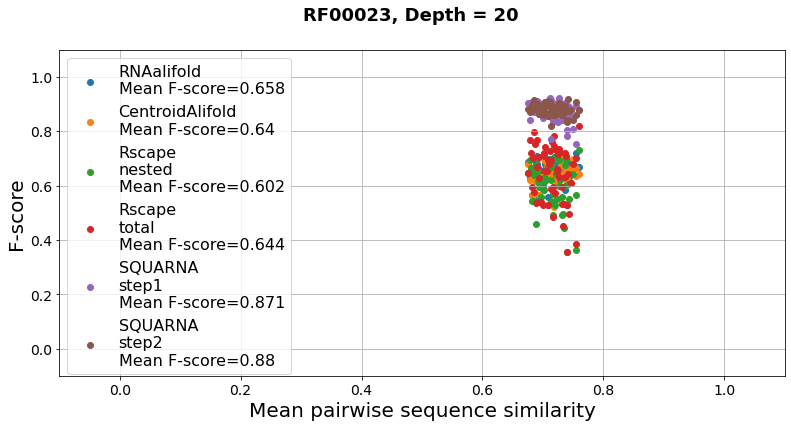

RNAalifold 5 -0.732
CentroidAlifold 5 -0.677
RscapeNested 5 0.183
RscapeTotal 5 0.185
SQUARNAs1 5 -0.752
SQUARNAs2 5 -0.776


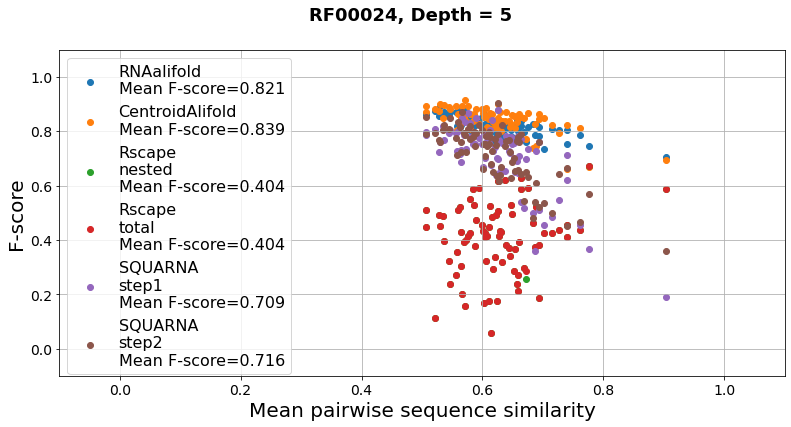

RNAalifold 10 -0.474
CentroidAlifold 10 -0.593
RscapeNested 10 0.108
RscapeTotal 10 0.108
SQUARNAs1 10 -0.599
SQUARNAs2 10 -0.705


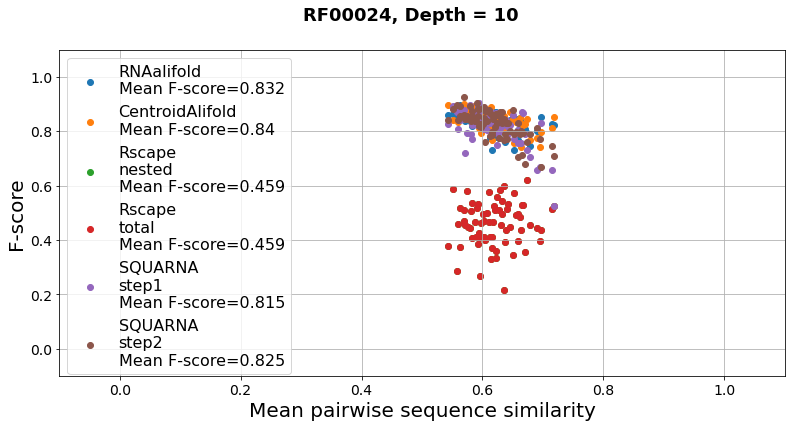

RNAalifold 20 -0.173
CentroidAlifold 20 -0.287
RscapeNested 20 0.425
RscapeTotal 20 0.425
SQUARNAs1 20 -0.108
SQUARNAs2 20 -0.713


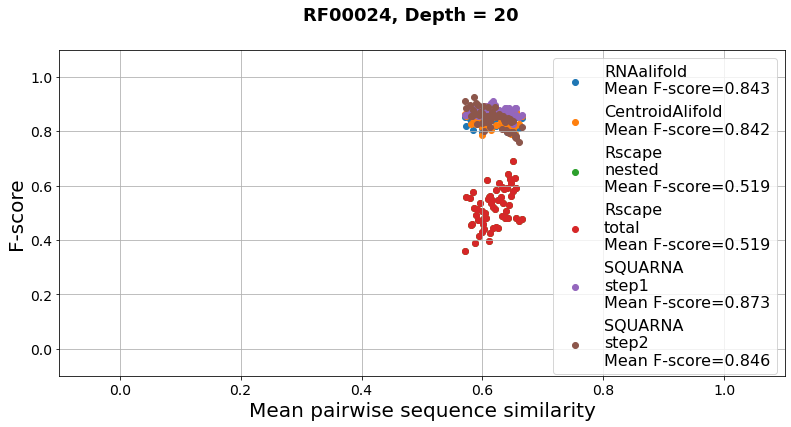

RNAalifold 5 -0.386
CentroidAlifold 5 -0.069
RscapeNested 5 0.189
RscapeTotal 5 0.184
SQUARNAs1 5 -0.221
SQUARNAs2 5 -0.286


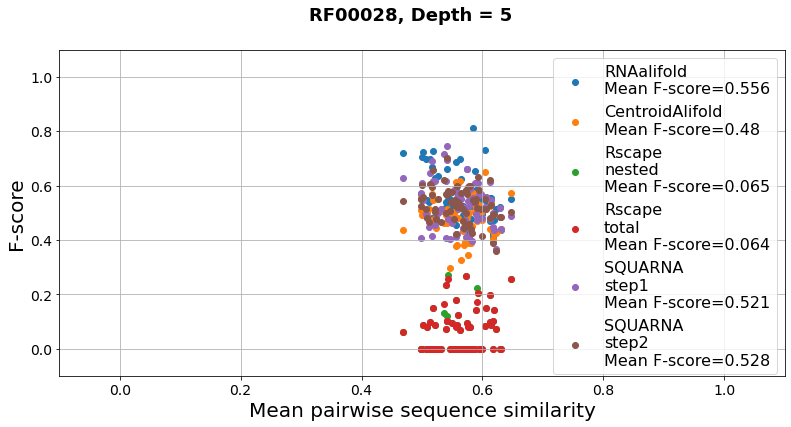

RNAalifold 10 0.339
CentroidAlifold 10 -0.057
RscapeNested 10 0.366
RscapeTotal 10 0.36
SQUARNAs1 10 -0.286
SQUARNAs2 10 -0.244


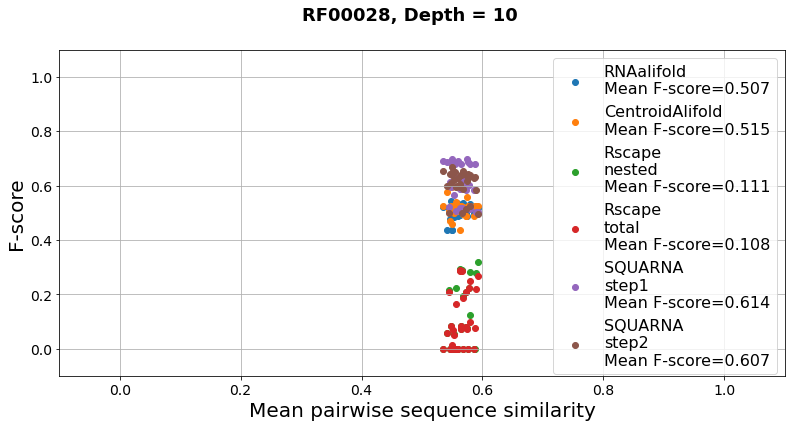

RNAalifold 5 -0.692
CentroidAlifold 5 -0.685
RscapeNested 5 0.129
RscapeTotal 5 0.129
SQUARNAs1 5 -0.265
SQUARNAs2 5 -0.616


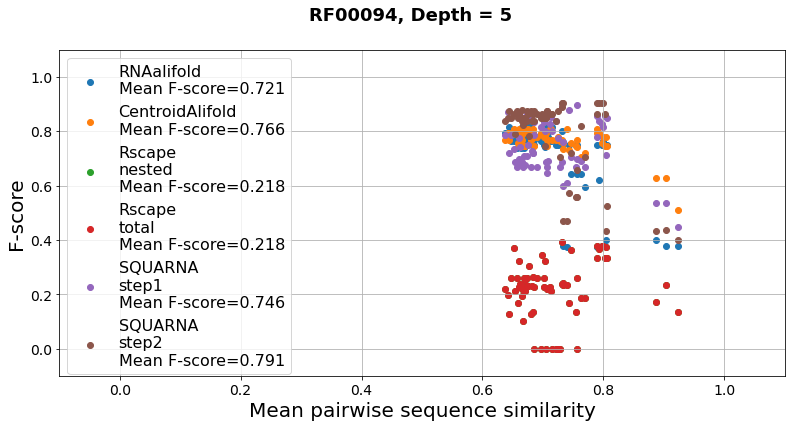

RNAalifold 10 -0.373
CentroidAlifold 10 -0.226
RscapeNested 10 -0.091
RscapeTotal 10 -0.091
SQUARNAs1 10 -0.252
SQUARNAs2 10 -0.428


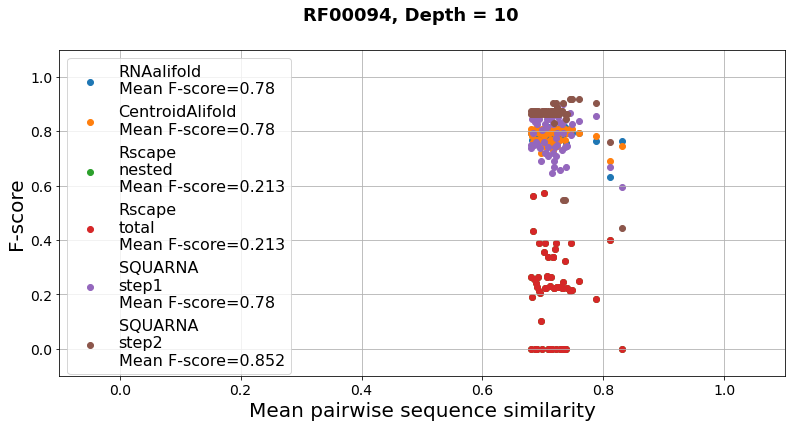

RNAalifold 20 0.1
CentroidAlifold 20 -0.078
RscapeNested 20 0.159
RscapeTotal 20 0.159
SQUARNAs1 20 0.583
SQUARNAs2 20 -0.556


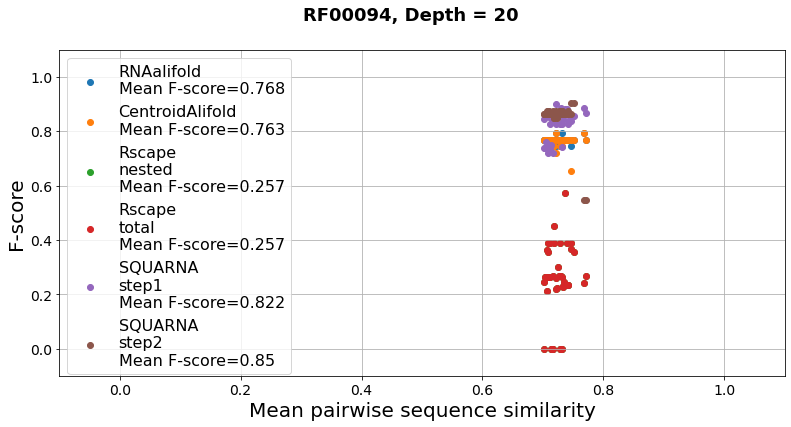

RNAalifold 5 -0.09
CentroidAlifold 5 -0.13
RscapeNested 5 0.183
RscapeTotal 5 0.182
SQUARNAs1 5 0.118
SQUARNAs2 5 -0.001


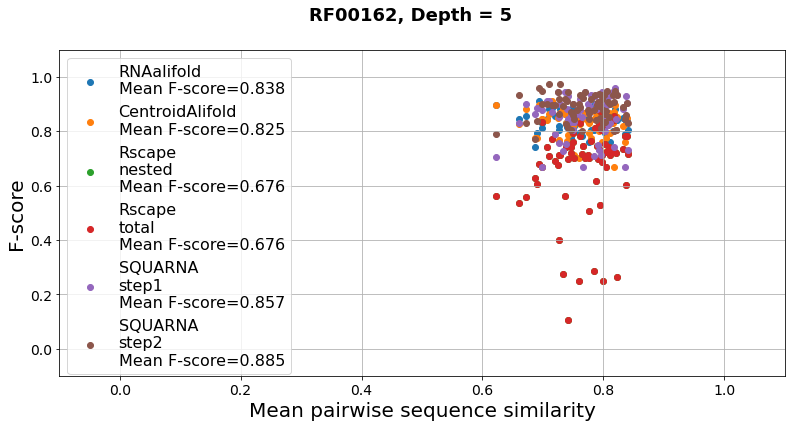

RNAalifold 10 -0.195
CentroidAlifold 10 -0.322
RscapeNested 10 0.04
RscapeTotal 10 0.04
SQUARNAs1 10 -0.104
SQUARNAs2 10 -0.219


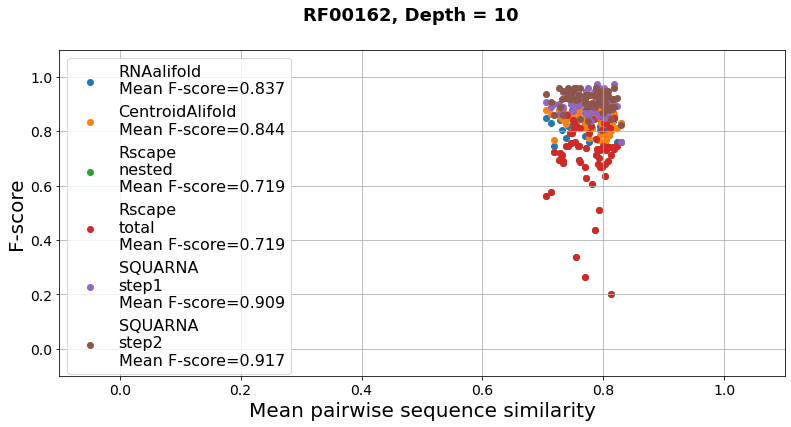

RNAalifold 20 -0.004
CentroidAlifold 20 -0.066
RscapeNested 20 0.178
RscapeTotal 20 0.155
SQUARNAs1 20 -0.044
SQUARNAs2 20 0.04


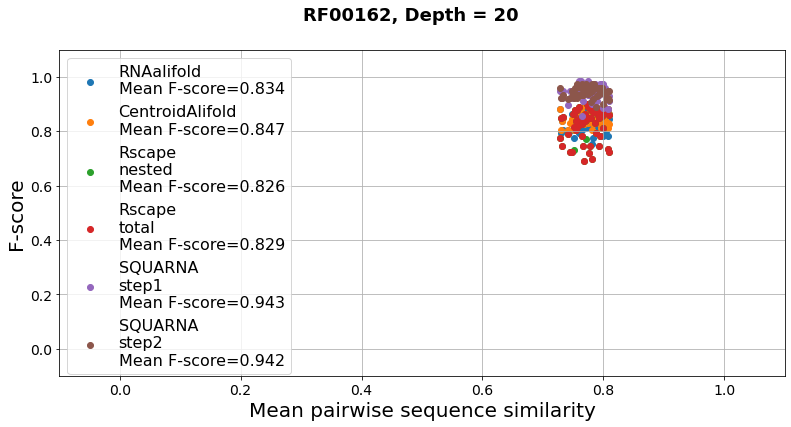

RNAalifold 5 -0.349
CentroidAlifold 5 -0.504
RscapeNested 5 0.17
RscapeTotal 5 0.177
SQUARNAs1 5 -0.542
SQUARNAs2 5 -0.538


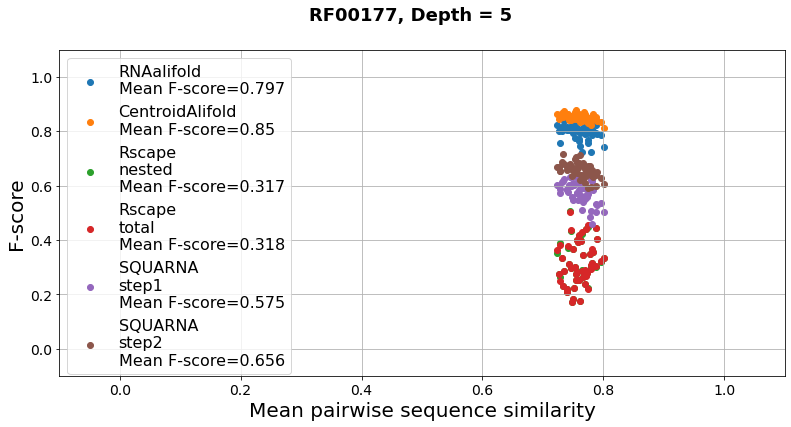

RNAalifold 10 -0.565
CentroidAlifold 10 -0.436
RscapeNested 10 -0.042
RscapeTotal 10 -0.044
SQUARNAs1 10 -0.527
SQUARNAs2 10 -0.478


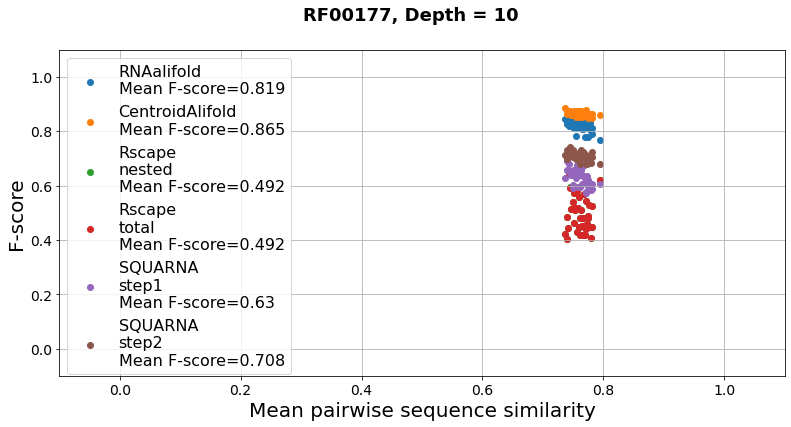

RNAalifold 20 -0.449
CentroidAlifold 20 -0.258
RscapeNested 20 0.162
RscapeTotal 20 0.162
SQUARNAs1 20 -0.488
SQUARNAs2 20 -0.272


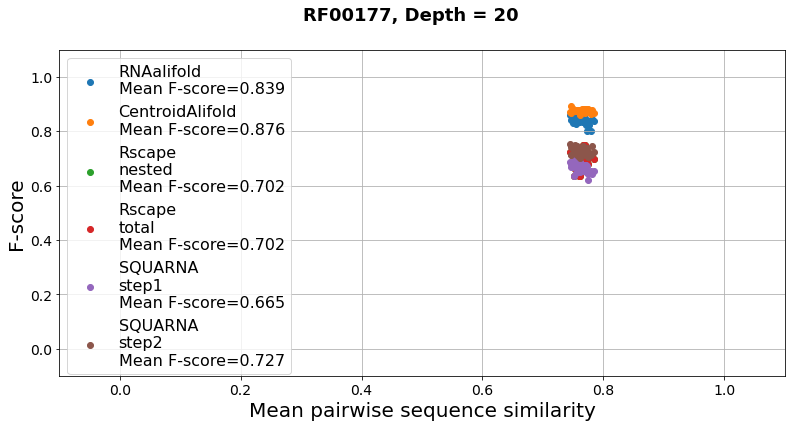

RNAalifold 5 0.485
CentroidAlifold 5 0.355
RscapeNested 5 0.013
RscapeTotal 5 0.013
SQUARNAs1 5 -0.164
SQUARNAs2 5 -0.339


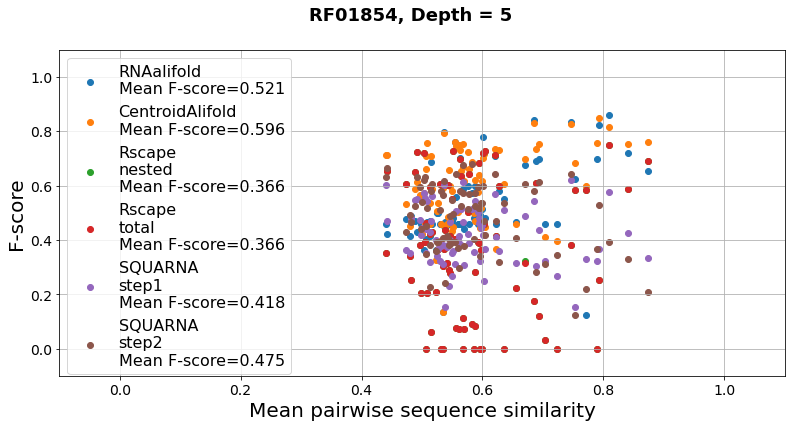

RNAalifold 10 0.464
CentroidAlifold 10 0.272
RscapeNested 10 -0.01
RscapeTotal 10 0.006
SQUARNAs1 10 -0.321
SQUARNAs2 10 -0.095


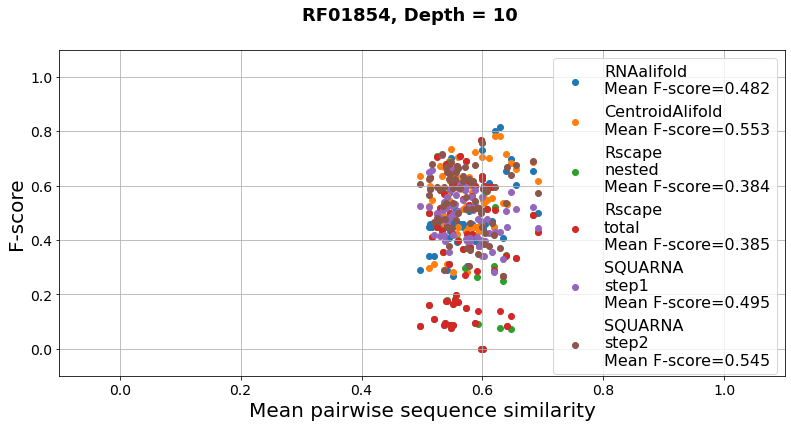

RNAalifold 20 0.247
CentroidAlifold 20 0.28
RscapeNested 20 0.025
RscapeTotal 20 0.022
SQUARNAs1 20 -0.352
SQUARNAs2 20 -0.296


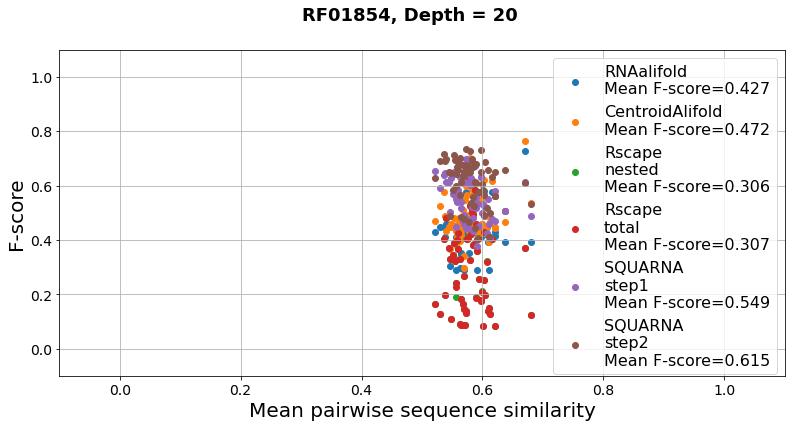

RNAalifold 5 -0.625
CentroidAlifold 5 -0.691
RscapeNested 5 -0.101
RscapeTotal 5 -0.113
SQUARNAs1 5 -0.686
SQUARNAs2 5 -0.683


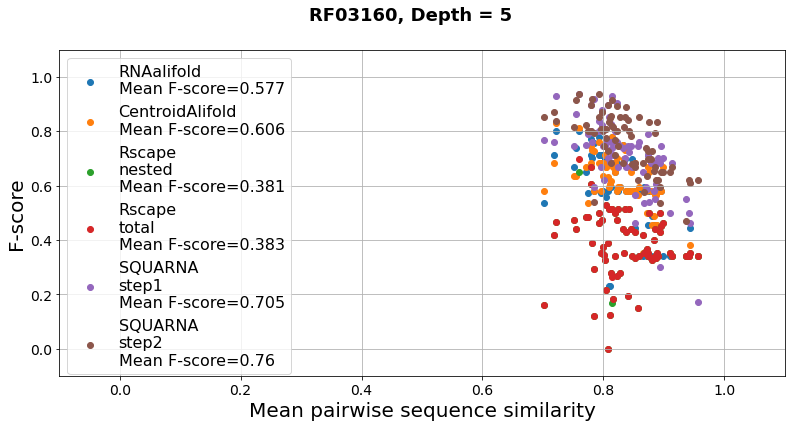

RNAalifold 10 -0.786
CentroidAlifold 10 -0.811
RscapeNested 10 -0.155
RscapeTotal 10 -0.197
SQUARNAs1 10 -0.668
SQUARNAs2 10 -0.712


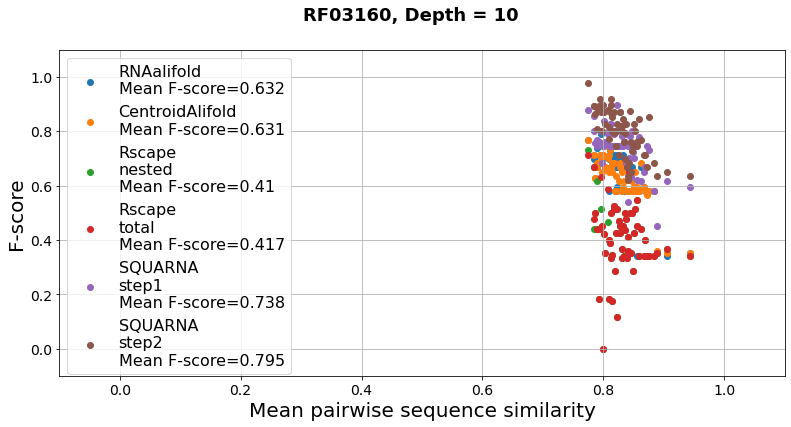

RNAalifold 20 -0.585
CentroidAlifold 20 -0.585
RscapeNested 20 -0.594
RscapeTotal 20 -0.666
SQUARNAs1 20 -0.647
SQUARNAs2 20 -0.705


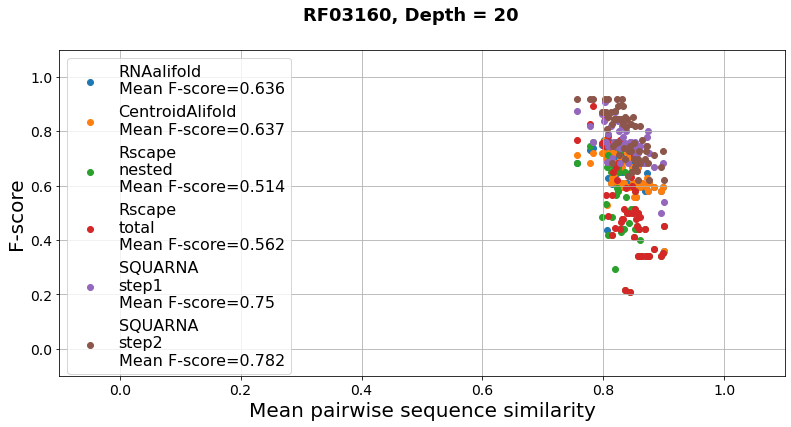

RNAalifold 5 -0.043
CentroidAlifold 5 -0.037
RscapeNested 5 0.037
RscapeTotal 5 0.036
SQUARNAs1 5 -0.172
SQUARNAs2 5 -0.221


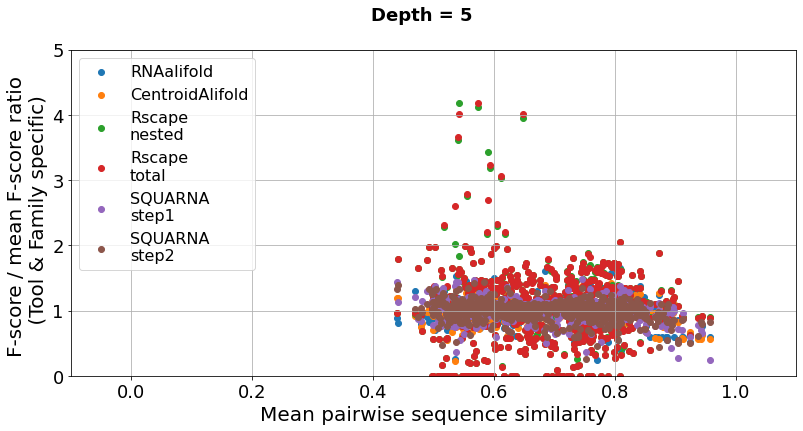

RNAalifold 10 0.001
CentroidAlifold 10 -0.025
RscapeNested 10 0.004
RscapeTotal 10 0.003
SQUARNAs1 10 -0.11
SQUARNAs2 10 -0.089


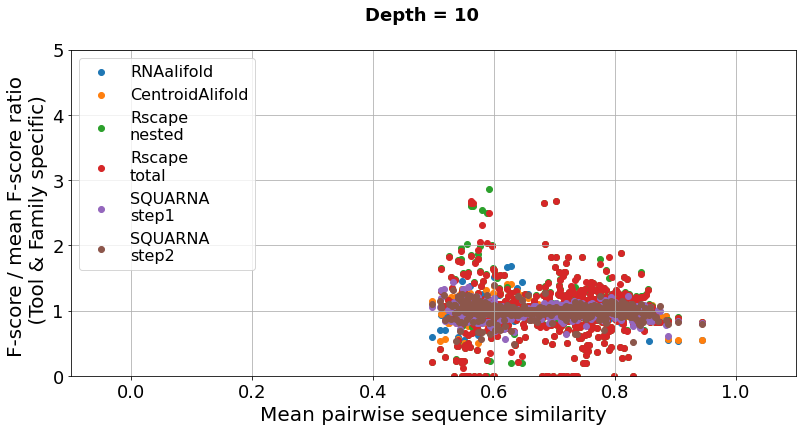

RNAalifold 20 -0.01
CentroidAlifold 20 -0.005
RscapeNested 20 -0.014
RscapeTotal 20 -0.02
SQUARNAs1 20 -0.064
SQUARNAs2 20 -0.092


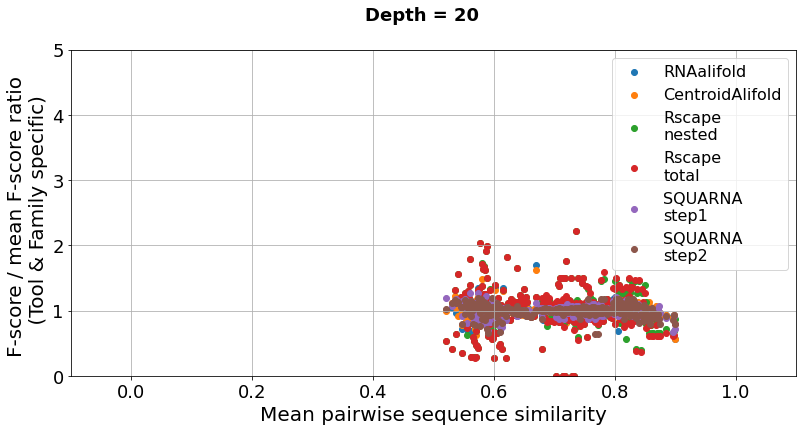

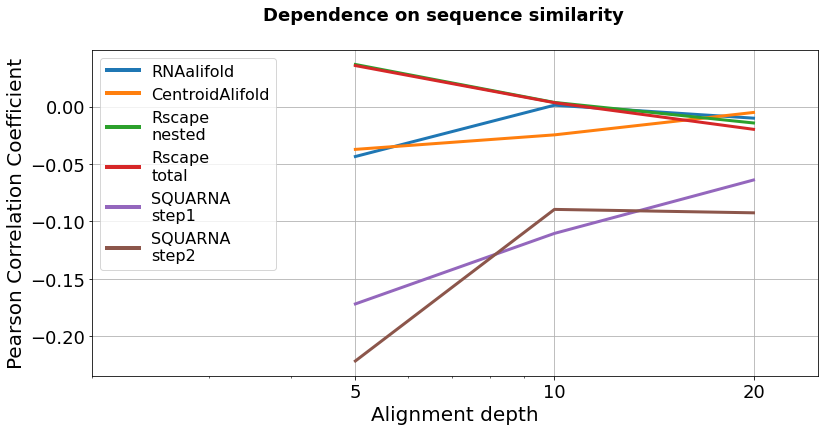

In [6]:
# For SeqSim graphs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams['fontname'] = "Lato"
mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['figure.titleweight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'medium'

SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


dataset = "SeqSim"

labels = {"RNAalifold":"RNAalifold",
          "SQUARNAs1":"SQUARNA\nstep1",
          "RscapeTotal":"Rscape\ntotal",
          "RscapeNested":"Rscape\nnested",
          "IPknot":"IPknot",
          "CentroidAlifold":"CentroidAlifold",
          "SQUARNAs2":"SQUARNA\nstep2",
          "SQUARNAs3i":"SQUARNA\nstep3i",
          "SQUARNAs3u":"SQUARNA\nstep3u",}

tools = "RNAalifold IPknot CentroidAlifold RscapeNested RscapeTotal SQUARNAs1 SQUARNAs2 SQUARNAs3u SQUARNAs3i".split(' ') 

families = ['RF00001', 'RF00005', 'RF00010', 'RF00023', 'RF00024', 
            'RF00028', 'RF00094', 'RF00162', 'RF00177', 'RF01854', 'RF03160']

depths = [5,10,20]

tools = "RNAalifold CentroidAlifold RscapeNested RscapeTotal SQUARNAs1 SQUARNAs2".split()

res = {}

for tool in tools:# 
    
    fams = {}

    with open("{0}/{0}_{1}.tsv".format(dataset,tool)) as tsv:
            lines  = tsv.readlines()
            title  = lines[0].strip().split('\t')
            fsind  = title.index("FS")
            dpind  = title.index("DEPTH")
            famind = title.index("NAME")
            for line in lines[1:]:
                linesplit = line.strip().split('\t')
                fam = linesplit[famind].split("_")[0]
                sim = int(linesplit[famind].split("_")[-1])/1000
                if fam not in fams:
                    fams[fam] = {}
                depth  = int(linesplit[dpind])
                fscore = float(linesplit[fsind])
                if depth not in fams[fam]:
                    fams[fam][depth] = []
                fams[fam][depth].append((sim,fscore))

    res[tool] = fams

res2 = {tool:{d:[] for d in depths} for tool in tools}
    
for fam in families:
    for depth in depths:
        
        if depth not in res[tools[0]][fam]:
            continue
        f, ax = plt.subplots(figsize=(13, 6))
        f.suptitle('{}, Depth = {}'.format(fam, depth), fontsize=18, fontweight='bold')
        ax.set_ylim([-0.1,1.1])
        ax.set_xlim([-0.1,1.1])

        for tool in tools:
            
            dots = res[tool][fam][depth]
            
            xx = [_[0] for _ in dots]
            yy = [_[1] for _ in dots]
            
            plt.scatter(xx, yy, alpha=1, label = "{}\nMean F-score={}".format(labels[tool],
                                                                                round(np.mean(yy),3)))
            my_rho = np.corrcoef(xx, yy)
            print(tool,depth, round(my_rho[0][1],3))
            mn = np.mean(yy)
            
            for i in range(len(xx)):
                res2[tool][depth].append((xx[i],yy[i]/mn))
            
        leg = ax.legend(fontsize=16)

        # change the line width for the legend
        for line in leg.get_lines():
            line.set_linewidth(4)
        ax.set_ylabel("F-score", fontsize=20)
        ax.set_xlabel("Mean pairwise sequence similarity", fontsize=20)
        ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
                        labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
        ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0],
                        labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
        plt.grid()
        plt.show()
        
corrs = {tool:[] for tool in tools}
        
for depth in depths:

    f, ax = plt.subplots(figsize=(13, 6))
    f.suptitle('Depth = {}'.format(depth), fontsize=18, fontweight='bold')
    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([0,5])

    for tool in tools:
            
        dots = res2[tool][depth]
            
        xx = [_[0] for _ in dots]
        yy = [_[1] for _ in dots]
            
        plt.scatter(xx, yy, alpha=1, label = "{}".format(labels[tool]))
        
        my_rho = np.corrcoef(xx, yy)
        print(tool,depth, round(my_rho[0][1],3))
        corrs[tool].append(my_rho[0][1])
              
    leg = ax.legend(fontsize=16)

    # change the line width for the legend
    for line in leg.get_lines():
        line.set_linewidth(4)
    ax.set_ylabel("F-score / mean F-score ratio \n (Tool & Family specific)", fontsize=20)
    ax.set_xlabel("Mean pairwise sequence similarity", fontsize=20)
    #ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
    #                labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    #ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0],
    #                labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
    plt.grid()
    plt.show()

f, ax = plt.subplots(figsize=(13, 6))
f.suptitle('Dependence on sequence similarity', fontsize=18, fontweight='bold')
ax.set_xlim([2, 25])
    
for tool in tools:

    

    xx = depths
    yy = corrs[tool]
            
    plt.plot(xx, yy, linewidth=3, label = "{}".format(labels[tool]))
              
leg = ax.legend(fontsize=16)

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(4)
ax.set_ylabel("Pearson Correlation Coefficient", fontsize=20)
ax.set_xlabel("Alignment depth", fontsize=20)
#ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],
#                labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=14)
ax.set_xscale("log")
ax.set_xticks(depths,
              labels=depths)
plt.grid()
plt.show()

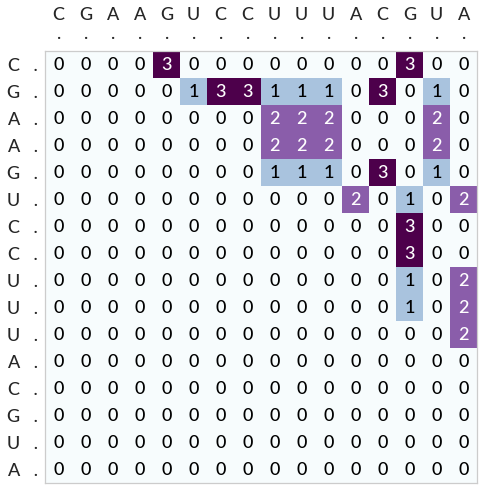

In [66]:
# Figure 1 = single-seq algorithm

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob

import scipy.stats as stats

# with 100%
import matplotlib.font_manager as fm

import matplotlib as mpl
#mpl.rcParams['fontname'] = "Lato"
mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['figure.titleweight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'medium'

SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seq = "CGAAGUCCUUUACGUA"
seq2 = seq[::-1]
dbn = "................"

bpw = {"GC":3,"AU":2,"GU":1,
       "CG":3,"UA":2,"UG":1}

N = len(seq)

heat = np.zeros([N,N], dtype=int)

for i in range(N-1):
    for j in range(i+4,N):
        if seq[i]+seq[j] in bpw:
            heat[i,j] = bpw[seq[i]+seq[j]]

heat = heat[::-1]
            
prop = fm.FontProperties(fname='/usr/share/fonts/Lato/Lato-Medium.ttf')

fig = plt.figure(
    figsize= (6, 6),  # размером 16 на 9 дюймов
)

ax = fig.add_axes([0,0,1,1])
    

maxc = 3
minc = 0
    
pos = ax.imshow(heat, cmap='BuPu', interpolation='nearest', vmin=minc, vmax=maxc)

for i in range(N):
    for j in range(N):
        colorr = 'white' if heat[i][j] >= (maxc-minc)/2 + minc else "black" 
        text = ax.text(j, i, str(heat[i][j]),
                        ha="center", va="center", color=colorr,fontproperties=prop)


        
ax.set_ylim(-0.5,N-0.5)
ax.set_xlim(-0.5,N-0.5)
ax.set_xticks(range(N))
ax.set_xticklabels([seq[i]+'\n'+dbn[i] for i in range(N)],fontproperties=prop,ha='center')
ax.set_yticks(range(N))
ax.set_yticklabels([seq2[i]+'   '+dbn[::-1][i] for i in range(N)],fontproperties=prop,ha='center',x=-0.03)

ax.tick_params(
    axis='x',  
    which='major',
    top=False, bottom=False,  # bottom only
    labeltop=True, labelbottom=False  # bottom only for labels too
)

plt.grid(False)
plt.savefig("Fig1A1.svg")
plt.show()

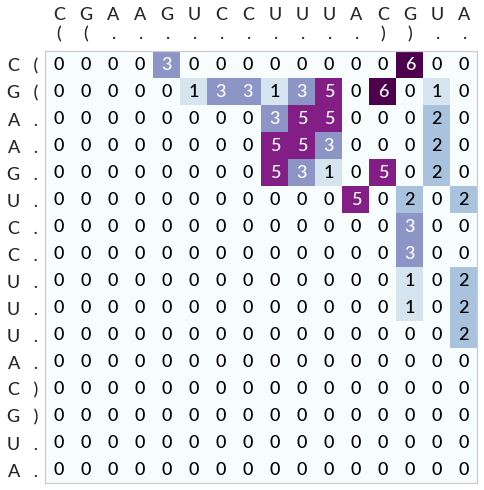

In [67]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob

import scipy.stats as stats

# with 100%
import matplotlib.font_manager as fm

#mpl.rcParams['fontname'] = "Lato"
mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['figure.titleweight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'medium'

SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seq = "CGAAGUCCUUUACGUA"
seq2 = seq[::-1]
dbn = "((..........)).."

bpw = {"GC":3,"AU":2,"GU":1,
       "CG":3,"UA":2,"UG":1}

N = len(seq)

heat = np.zeros([N,N], dtype=int)

for i in range(N-1):
    for j in range(i+4,N):
        if seq[i]+seq[j] in bpw:
            heat[i,j] = bpw[seq[i]+seq[j]]

heat = heat[::-1]
            
prop = fm.FontProperties(fname='/usr/share/fonts/Lato/Lato-Medium.ttf')

fig = plt.figure(
    figsize= (6, 6),  # размером 16 на 9 дюймов
)

ax = fig.add_axes([0,0,1,1])
    
heat[14,9] = 3
heat[13,8] = 3
heat[14,10] = 5
heat[13,9] = 5
heat[12,8] = 5
heat[13,10] = 5
heat[12,9] = 5
heat[11,8] = 5
heat[12,10] = 3
heat[11,9] = 3
heat[11,12] = 5
heat[10,11] = 5
heat[11,14] = 2
heat[10,13] = 2
heat[15,13] = 6
heat[14,12] = 6

maxc = 6
minc = 0
    
    
    
pos = ax.imshow(heat, cmap='BuPu', interpolation='nearest', vmin=minc, vmax=maxc)

for i in range(N):
    for j in range(N):
        colorr = 'white' if heat[i][j] >= (maxc-minc)/2 + minc else "black" 
        text = ax.text(j, i, str(heat[i][j]),
                        ha="center", va="center", color=colorr,fontproperties=prop)


        
ax.set_ylim(-0.5,N-0.5)
ax.set_xlim(-0.5,N-0.5)
ax.set_xticks(range(N))
ax.set_xticklabels([seq[i]+'\n'+dbn[i] for i in range(N)],fontproperties=prop,ha='center')
ax.set_yticks(range(N))
ax.set_yticklabels([seq2[i]+'   '+dbn[::-1][i] for i in range(N)],fontproperties=prop,ha='center',x=-0.03)

ax.tick_params(
    axis='x',  
    which='major',
    top=False, bottom=False,  # bottom only
    labeltop=True, labelbottom=False  # bottom only for labels too
)

plt.grid(False)
plt.savefig("Fig1A2.svg")
plt.show()



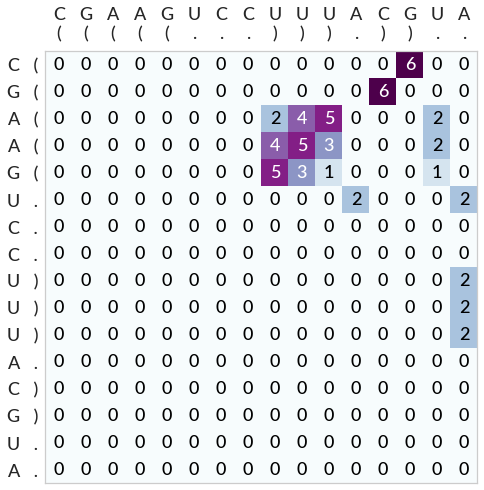

In [73]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob

import scipy.stats as stats

# with 100%
import matplotlib.font_manager as fm

#mpl.rcParams['fontname'] = "Lato"
mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['figure.titleweight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'medium'

SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seq = "CGAAGUCCUUUACGUA"
seq2 = seq[::-1]
dbn = "(((((...))).)).."

bpw = {"GC":3,"AU":2,"GU":1,
       "CG":3,"UA":2,"UG":1}

N = len(seq)

heat = np.zeros([N,N], dtype=int)

for i in range(N-1):
    for j in range(i+4,N):
        if seq[i]+seq[j] in bpw:
            heat[i,j] = bpw[seq[i]+seq[j]]

heat = heat[::-1]
            
prop = fm.FontProperties(fname='/usr/share/fonts/Lato/Lato-Medium.ttf')

fig = plt.figure(
    figsize= (6, 6),  # размером 16 на 9 дюймов
)

ax = fig.add_axes([0,0,1,1])
    
heat[15,:] = 0
heat[14,:] = 0
heat[:,13] = 0
heat[:,12] = 0
heat[15,13] = 6
heat[14,12] = 6
heat[13,10] = 5
heat[12,9] = 5
heat[11,8] = 5
heat[13,9] = 4
heat[12,8] = 4
heat[12,10] = 3
heat[11,9] = 3

maxc = 6
minc = 0
    
    
    
pos = ax.imshow(heat, cmap='BuPu', interpolation='nearest', vmin=minc, vmax=maxc)

for i in range(N):
    for j in range(N):
        colorr = 'white' if heat[i][j] >= (maxc-minc)/2 + minc else "black" 
        text = ax.text(j, i, str(heat[i][j]),
                        ha="center", va="center", color=colorr,fontproperties=prop)


        
ax.set_ylim(-0.5,N-0.5)
ax.set_xlim(-0.5,N-0.5)
ax.set_xticks(range(N))
ax.set_xticklabels([seq[i]+'\n'+dbn[i] for i in range(N)],fontproperties=prop,ha='center')
ax.set_yticks(range(N))
ax.set_yticklabels([seq2[i]+'   '+dbn[::-1][i] for i in range(N)],fontproperties=prop,ha='center',x=-0.03)

ax.tick_params(
    axis='x',  
    which='major',
    top=False, bottom=False,  # bottom only
    labeltop=True, labelbottom=False  # bottom only for labels too
)

plt.grid(False)
plt.savefig("Fig1A3.svg")
plt.show()



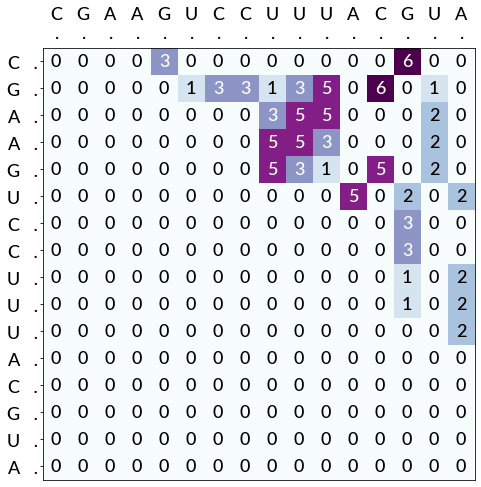

In [4]:
# Figure 3 - alignment-based figure
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
from Stems import SQRNdbnali

import scipy.stats as stats

# with 100%
import matplotlib.font_manager as fm

#mpl.rcParams['fontname'] = "Lato"
mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['figure.titleweight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'medium'

SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seq = "CGAAGUCCUUUACGUA"
seq2 = seq[::-1]
dbn = "(((((...))).)).."
dbn = "................"

bpw = {"GC":3,"AU":2,"GU":1,
       "CG":3,"UA":2,"UG":1}

N = len(seq)

heat = np.zeros([N,N], dtype=int)


objs = [["temp",seq,None,None,None],]
mat = SQRNdbnali(objs, defrests = None, defreacts = None, defref = None,
                 bpweights = bpw, interchainonly = False,
                 minlen = 1, minbpscore = 0,
                 threads = 1, verbose = False)[1]

for i in range(N-1):
    for j in range(i+4,N):
        heat[i,j] = mat[i,j] # bpw[seq[i]+seq[j]]

heat = heat[::-1]
            
prop = fm.FontProperties(fname='/usr/share/fonts/Lato/Lato-Medium.ttf')

fig = plt.figure(
    figsize= (6, 6),  # размером 16 на 9 дюймов
)

ax = fig.add_axes([0,0,1,1])
    


maxc = np.max(heat)
minc = np.min(heat)
    
    
    
pos = ax.imshow(heat, cmap='BuPu', interpolation='nearest', vmin=minc, vmax=maxc)

for i in range(N):
    for j in range(N):
        colorr = 'white' if heat[i][j] >= (maxc-minc)/2 + minc else "black" 
        text = ax.text(j, i, str(heat[i][j]),
                        ha="center", va="center", color=colorr,fontproperties=prop)


        
ax.set_ylim(-0.5,N-0.5)
ax.set_xlim(-0.5,N-0.5)
ax.set_xticks(range(N))
ax.set_xticklabels([seq[i]+'\n'+dbn[i] for i in range(N)],fontproperties=prop,ha='center')
ax.set_yticks(range(N))
ax.set_yticklabels([seq2[i]+'   '+dbn[::-1][i] for i in range(N)],fontproperties=prop,ha='center',x=-0.03)

ax.tick_params(
    axis='x',  
    which='major',
    top=False, bottom=False,  # bottom only
    labeltop=True, labelbottom=False  # bottom only for labels too
)

plt.grid(False)
plt.savefig("Fig3A.svg")
plt.show()



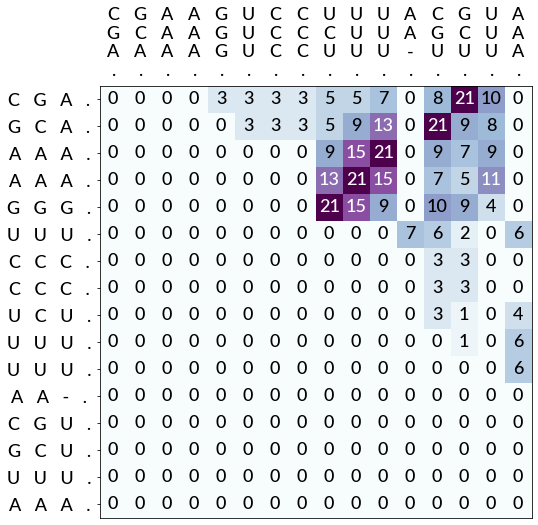

In [2]:
# Figure 3 - alignment-based figure
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
from Stems import SQRNdbnali

import scipy.stats as stats

# with 100%
import matplotlib.font_manager as fm

#mpl.rcParams['fontname'] = "Lato"
mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['figure.titleweight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'medium'

SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seq = "CGAAGUCCUUUACGUA"
seq2 = seq[::-1]
seqB = "GCAAGUCCCUUAGCUA"
seqC = "AAAAGUCCUUU-UUUA"
seq2B = seqB[::-1]
seq2C = seqC[::-1]
dbn = "(((((...))).)).."
dbn = "................"

bpw = {"GC":3,"AU":2,"GU":1,
       "CG":3,"UA":2,"UG":1}

N = len(seq)

heat = np.zeros([N,N], dtype=int)


objs = [["temp1",seq,None,None,None],
        ["temp2",seqB,None,None,None],
        ["temp3",seqC,None,None,None]]
mat = SQRNdbnali(objs, defrests = None, defreacts = None, defref = None,
                 bpweights = bpw, interchainonly = False,
                 minlen = 1, minbpscore = 0,
                 threads = 1, verbose = False)[1]

for i in range(N-1):
    for j in range(i+4,N):
        heat[i,j] = mat[i,j] # bpw[seq[i]+seq[j]]

heat = heat[::-1]
            
prop = fm.FontProperties(fname='/usr/share/fonts/Lato/Lato-Medium.ttf')

fig = plt.figure(
    figsize= (6, 6),  # размером 16 на 9 дюймов
)

ax = fig.add_axes([0,0,1,1])
    


maxc = np.max(heat)
minc = np.min(heat)
    
    
    
pos = ax.imshow(heat, cmap='BuPu', interpolation='nearest', vmin=minc, vmax=maxc)

for i in range(N):
    for j in range(N):
        colorr = 'white' if heat[i][j] >= (maxc-minc)/2 + minc else "black" 
        text = ax.text(j, i, str(heat[i][j]),
                        ha="center", va="center", color=colorr,fontproperties=prop)


        
ax.set_ylim(-0.5,N-0.5)
ax.set_xlim(-0.5,N-0.5)
ax.set_xticks(range(N))
ax.set_xticklabels([seq[i]+'\n'+seqB[i]+'\n'+seqC[i]+'\n'+dbn[i] for i in range(N)],fontproperties=prop,ha='center')
ax.set_yticks(range(N))
ax.set_yticklabels([seq2[i]+'   '+seq2B[i]+'   '+seq2C[i]+'   '+dbn[::-1][i] 
                    for i in range(N)],fontproperties=prop,ha='center',x=-0.10)

ax.tick_params(
    axis='x',  
    which='major',
    top=False, bottom=False,  # bottom only
    labeltop=True, labelbottom=False  # bottom only for labels too
)

plt.grid(False)
plt.savefig("Fig3B.svg")
plt.show()



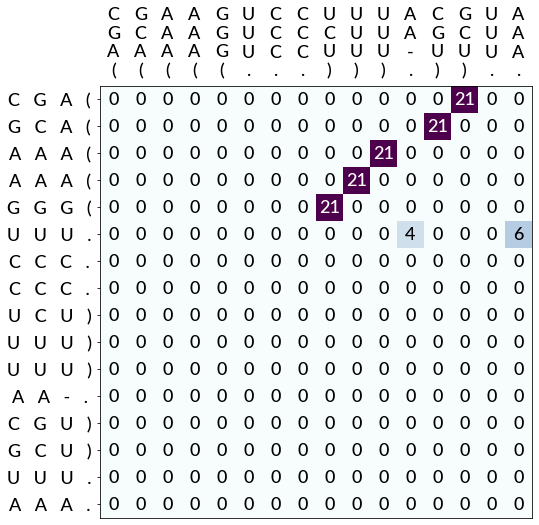

In [3]:
# Figure 3 - alignment-based figure
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
from Stems import SQRNdbnali

import scipy.stats as stats

# with 100%
import matplotlib.font_manager as fm

#mpl.rcParams['fontname'] = "Lato"
mpl.rcParams['font.weight'] = "medium"
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['figure.titleweight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'medium'

SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seq = "CGAAGUCCUUUACGUA"
seq2 = seq[::-1]
seqB = "GCAAGUCCCUUAGCUA"
seqC = "AAAAGUCCUUU-UUUA"
seq2B = seqB[::-1]
seq2C = seqC[::-1]
dbn = "(((((...))).)).."
#dbn = "................"

bpw = {"GC":3,"AU":2,"GU":1,
       "CG":3,"UA":2,"UG":1}

N = len(seq)

heat = np.zeros([N,N], dtype=int)


objs = [["temp",seq,None,None,None],
        ["temp",seqB,None,None,None],
        ["temp",seqC,None,None,None]]
mat = SQRNdbnali(objs, defrests = dbn, defreacts = None, defref = None,
                 bpweights = bpw, interchainonly = False,
                 minlen = 1, minbpscore = 0,
                 threads = 1, verbose = False)[1]

for i in range(N-1):
    for j in range(i+4,N):
        heat[i,j] = mat[i,j] # bpw[seq[i]+seq[j]]

heat = heat[::-1]
            
prop = fm.FontProperties(fname='/usr/share/fonts/Lato/Lato-Medium.ttf')

fig = plt.figure(
    figsize= (6, 6),  # размером 16 на 9 дюймов
)

ax = fig.add_axes([0,0,1,1])
    


maxc = np.max(heat)
minc = np.min(heat)
    
    
    
pos = ax.imshow(heat, cmap='BuPu', interpolation='nearest', vmin=minc, vmax=maxc)

for i in range(N):
    for j in range(N):
        colorr = 'white' if heat[i][j] >= (maxc-minc)/2 + minc else "black" 
        text = ax.text(j, i, str(heat[i][j]),
                        ha="center", va="center", color=colorr,fontproperties=prop)


        
ax.set_ylim(-0.5,N-0.5)
ax.set_xlim(-0.5,N-0.5)
ax.set_xticks(range(N))
ax.set_xticklabels([seq[i]+'\n'+seqB[i]+'\n'+seqC[i]+'\n'+dbn[i] for i in range(N)],fontproperties=prop,ha='center')
ax.set_yticks(range(N))
ax.set_yticklabels([seq2[i]+'   '+seq2B[i]+'   '+seq2C[i]+'   '+dbn[::-1][i] 
                    for i in range(N)],fontproperties=prop,ha='center',x=-0.10)

ax.tick_params(
    axis='x',  
    which='major',
    top=False, bottom=False,  # bottom only
    labeltop=True, labelbottom=False  # bottom only for labels too
)

plt.grid(False)
plt.savefig("Fig3C.svg")
plt.show()

